In [202]:
import numpy as np
import pandas as pd

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [203]:
auto_df = pd.read_csv("CarPrice_Assignment.csv")

In [204]:
auto_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [205]:
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

# Step 1 : Data Preparation and Data quality check

### Getting the Company Name from the CarName

In [206]:
auto_df['CompanyName'] = auto_df['CarName'].apply(lambda x : x.split(' ')[0] )

### Checking the Categorical variables and fixing the data if needed

In [207]:
auto_df.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [208]:
#fixing the incorrect names
correct_company_name = {'alfa-romero':'alfa-romero','audi':'audi','bmw':'bmw','chevrolet':'chevrolet', 'dodge':'dodge','honda':'honda','isuzu':'isuzu','jaguar':'jaguar','maxda':'mazda','mazda':'mazda', 'buick':'buick','mercury':'mercury','mitsubishi':'mitsubishi','Nissan':'Nissan', 'peugeot':'peugeot','plymouth':'plymouth','porsche':'porsche','renault':'renault', 'saab':'saab','subaru':'subaru','toyota':'toyota','volkswagen':'volkswagen','volvo':'volvo','nissan' : 'Nissan', 'porcshce':'porsche','toyouta':'toyota','vokswagen':'volkswagen','vw':'volkswagen'}

In [209]:
auto_df['CompanyName'] = auto_df['CompanyName'].map(correct_company_name)

##### validating all the columns highlevel to check for any duplicates

In [210]:
auto_df.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [211]:
auto_df.fueltype.unique()

array(['gas', 'diesel'], dtype=object)

In [212]:
auto_df.aspiration.unique()

array(['std', 'turbo'], dtype=object)

In [213]:
auto_df.doornumber.unique()

array(['two', 'four'], dtype=object)

In [214]:
auto_df.carbody.unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [215]:
auto_df.drivewheel.unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [216]:
auto_df.enginelocation.unique()

array(['front', 'rear'], dtype=object)

In [217]:
auto_df.enginetype.unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [218]:
auto_df.cylindernumber.unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [219]:
auto_df.fuelsystem.unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

In [220]:
auto_df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## Step 2 : Visualizing the Data

In [221]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Visualizing the numerical variables

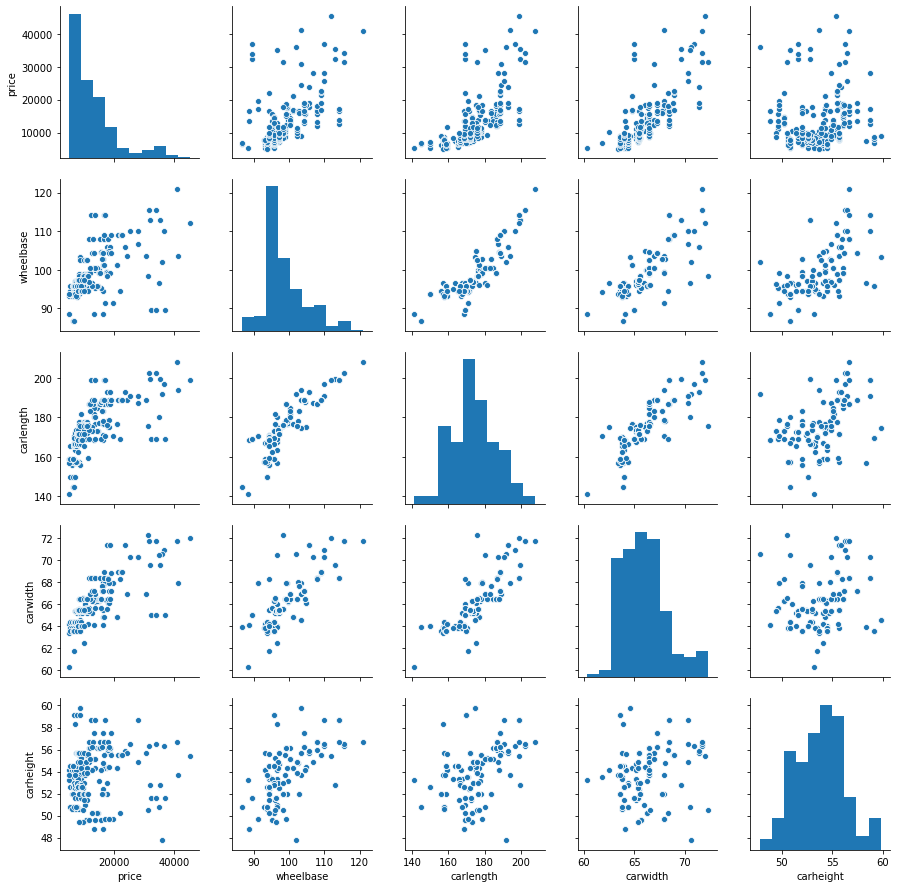

In [222]:
sns.pairplot(auto_df[['price','wheelbase','carlength','carwidth','carheight']])
plt.show()

- We do see a bit of linear relationship between carlength ,carwidth and wheelbase ,we will keep this for now and check later when we are doing VIF to check for correlations

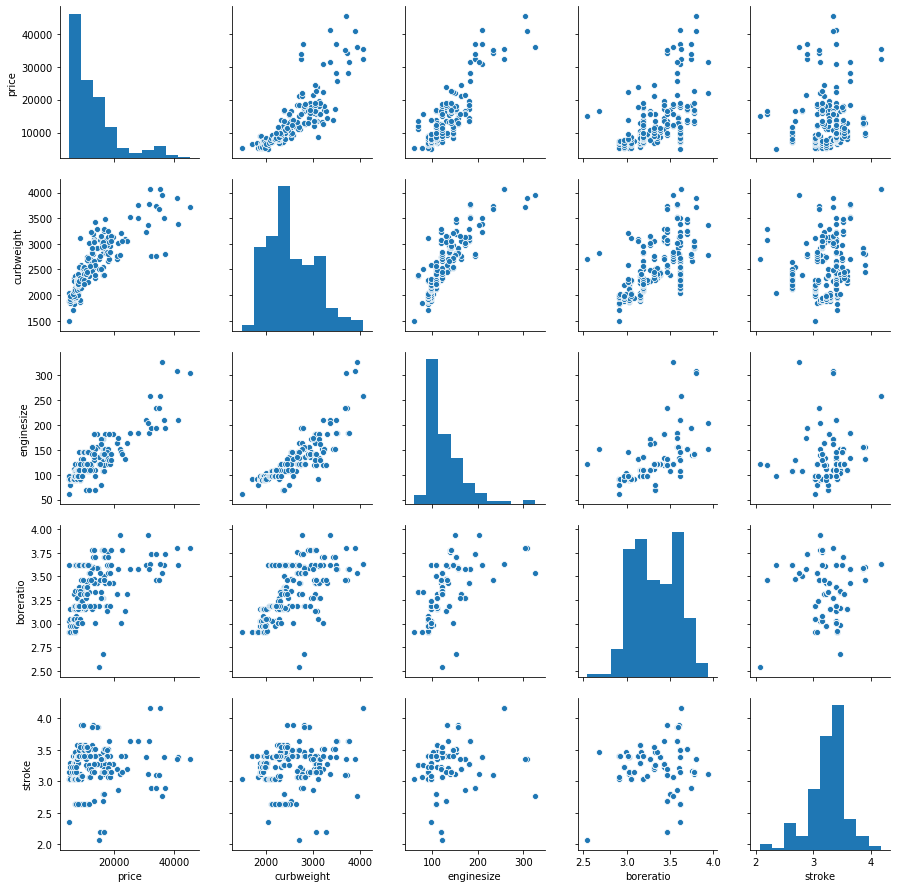

In [223]:
sns.pairplot(auto_df[['price','curbweight','enginesize','boreratio','stroke']])
plt.show()

- nothing very concrete here

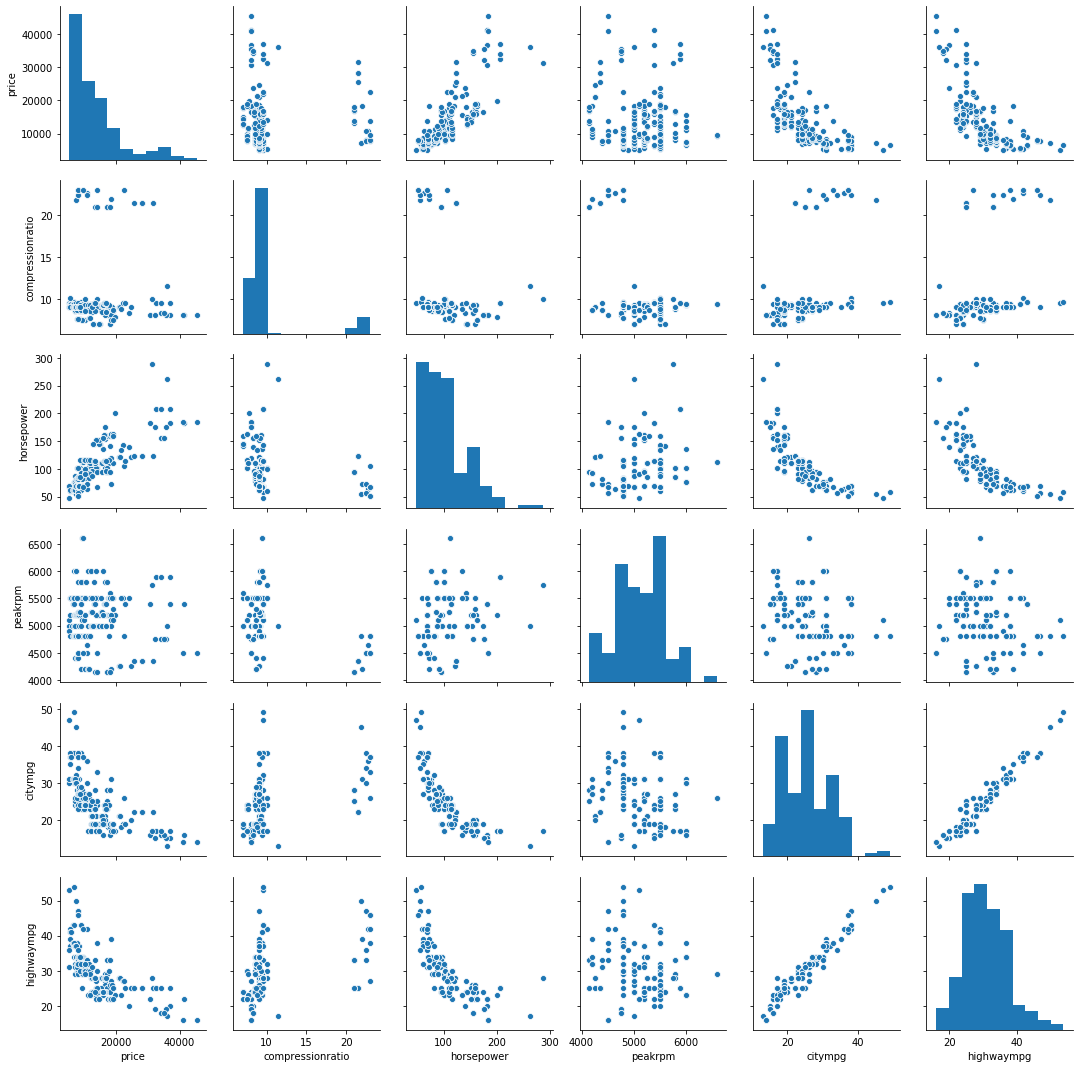

In [224]:
sns.pairplot(auto_df[['price','compressionratio','horsepower','peakrpm','citympg','highwaympg']])
plt.show()

- There is very strong linear relationship between highwaympg and citympg and as per general knowledge also we know they are very related so we will only use one column from here.

### Visualising Categorical Variables

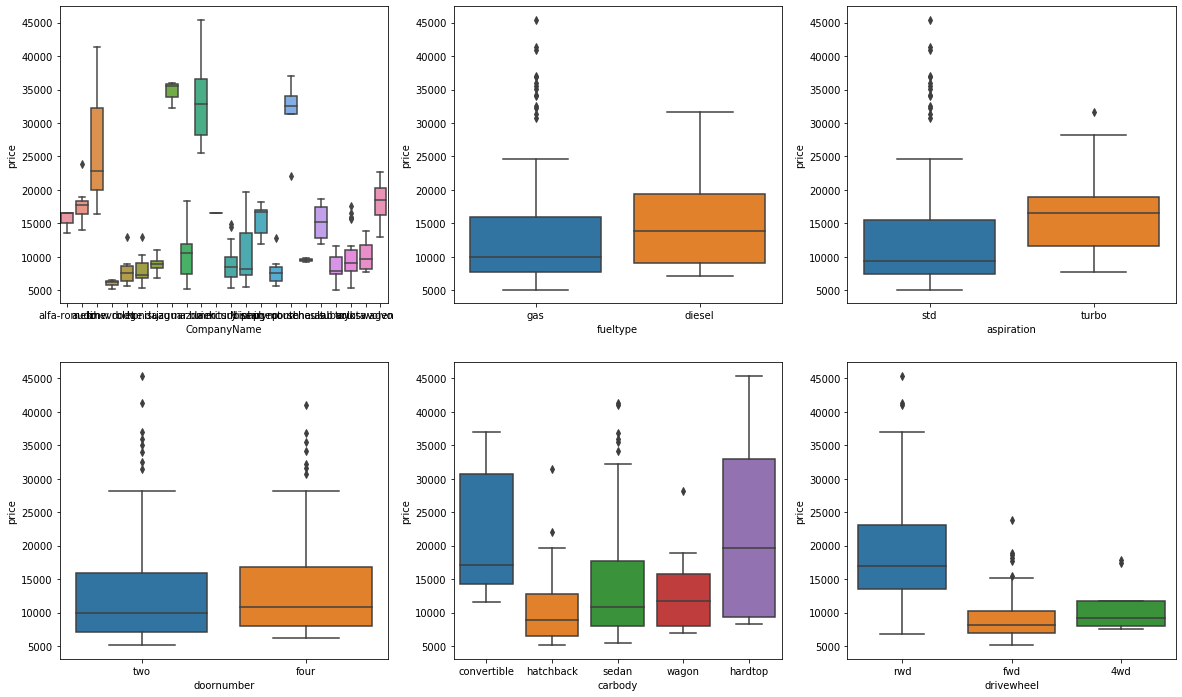

In [225]:
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.boxplot(x='CompanyName',y = 'price',data = auto_df)
plt.subplot(2,3,2)
sns.boxplot(x='fueltype',y = 'price',data = auto_df)
plt.subplot(2,3,3)
sns.boxplot(x='aspiration',y = 'price',data = auto_df)
plt.subplot(2,3,4)
sns.boxplot(x='doornumber',y = 'price',data = auto_df)
plt.subplot(2,3,5)
sns.boxplot(x='carbody',y = 'price',data = auto_df)
plt.subplot(2,3,6)
sns.boxplot(x='drivewheel',y = 'price',data = auto_df)
plt.show()

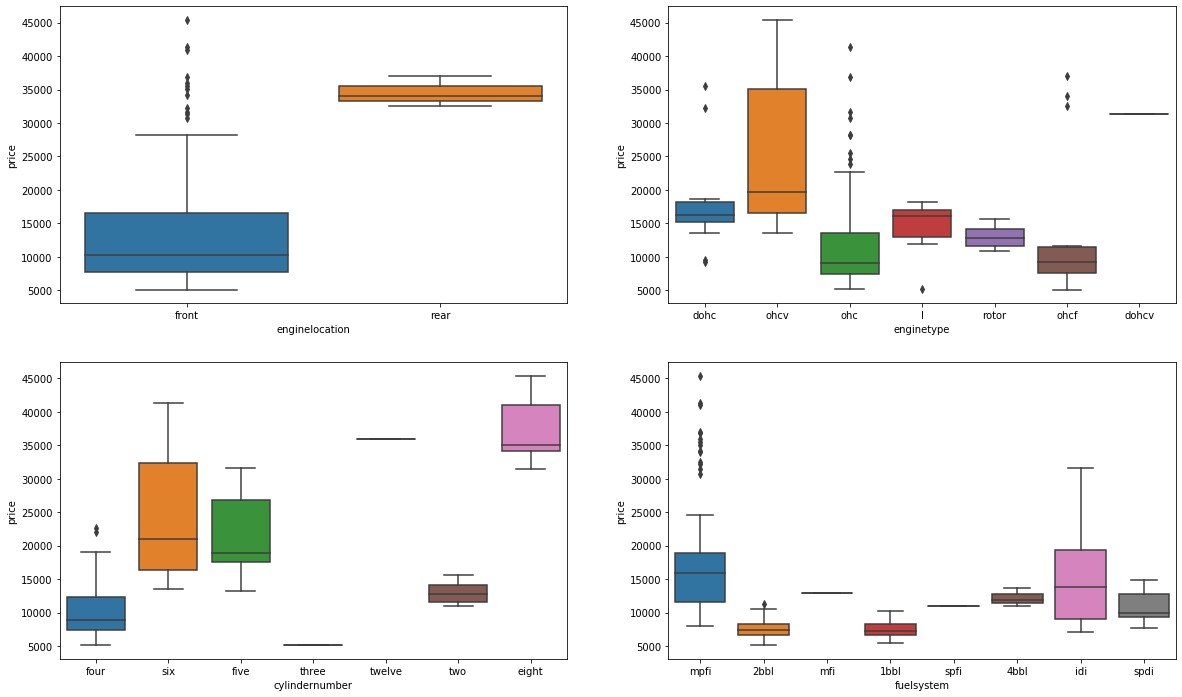

In [226]:
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
sns.boxplot(x='enginelocation',y = 'price',data = auto_df)
plt.subplot(2,2,2)
sns.boxplot(x='enginetype',y = 'price',data = auto_df)
plt.subplot(2,2,3)
sns.boxplot(x='cylindernumber',y = 'price',data = auto_df)
plt.subplot(2,2,4)
sns.boxplot(x='fuelsystem',y = 'price',data = auto_df)
plt.show()

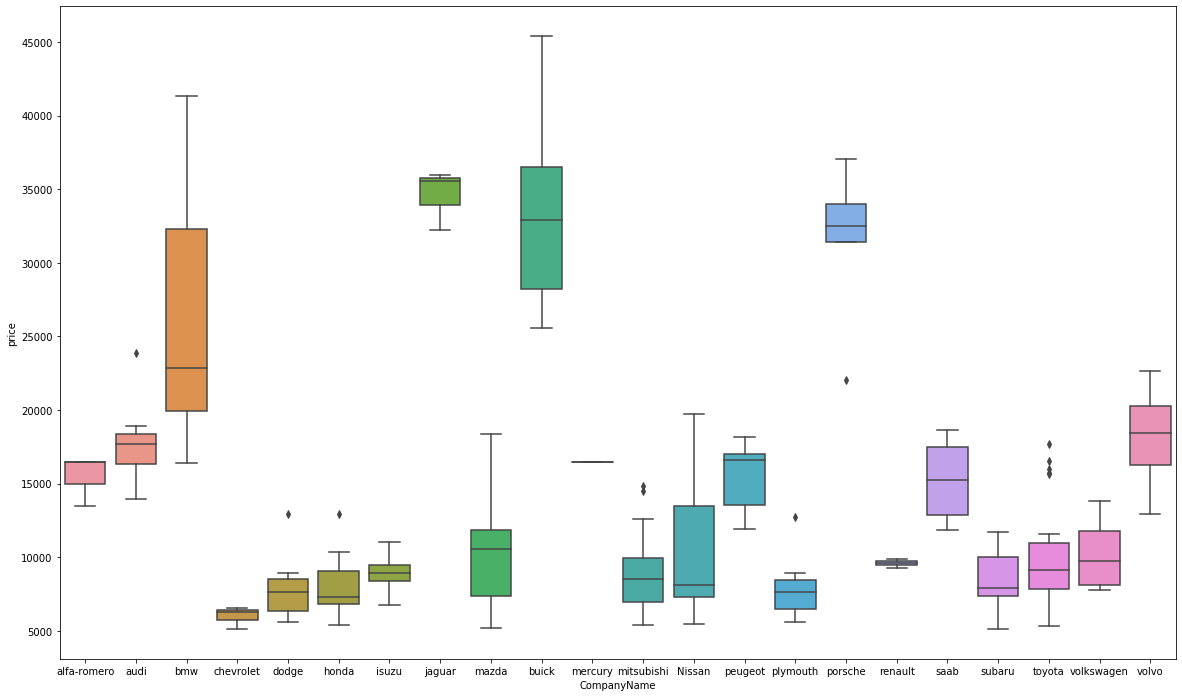

In [227]:
plt.figure(figsize=(20,12))
sns.boxplot(x='CompanyName',y = 'price',data = auto_df)
plt.show()

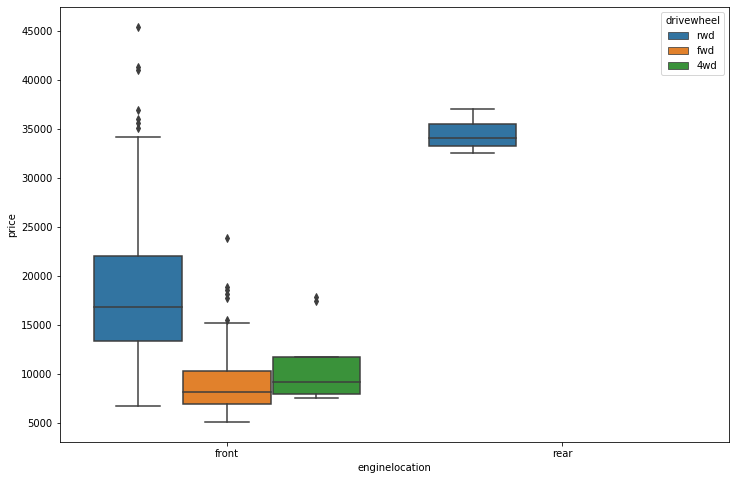

In [228]:
plt.figure(figsize=(12,8))
sns.boxplot(x='enginelocation',y = 'price', hue = 'drivewheel', data = auto_df)
plt.show()

Looks like enginelocation and drivewheel are very closely related

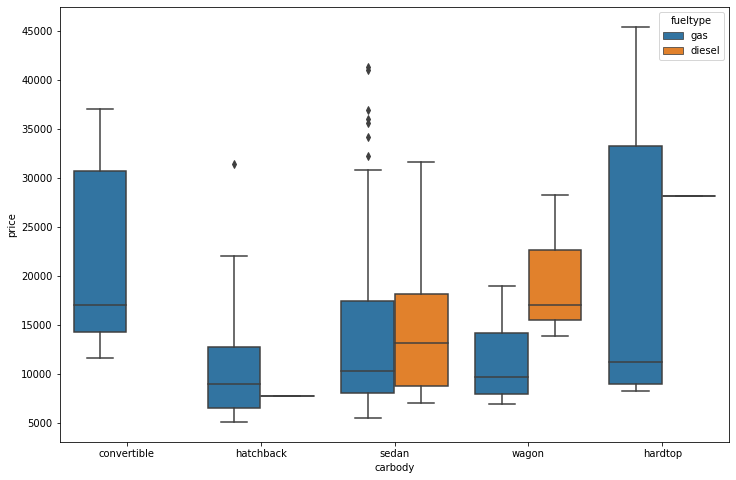

In [229]:
plt.figure(figsize=(12,8))
sns.boxplot(x='carbody',y = 'price', hue = 'fueltype', data = auto_df)
plt.show()

- Nothing very concrete from the visual representation of the categorical data

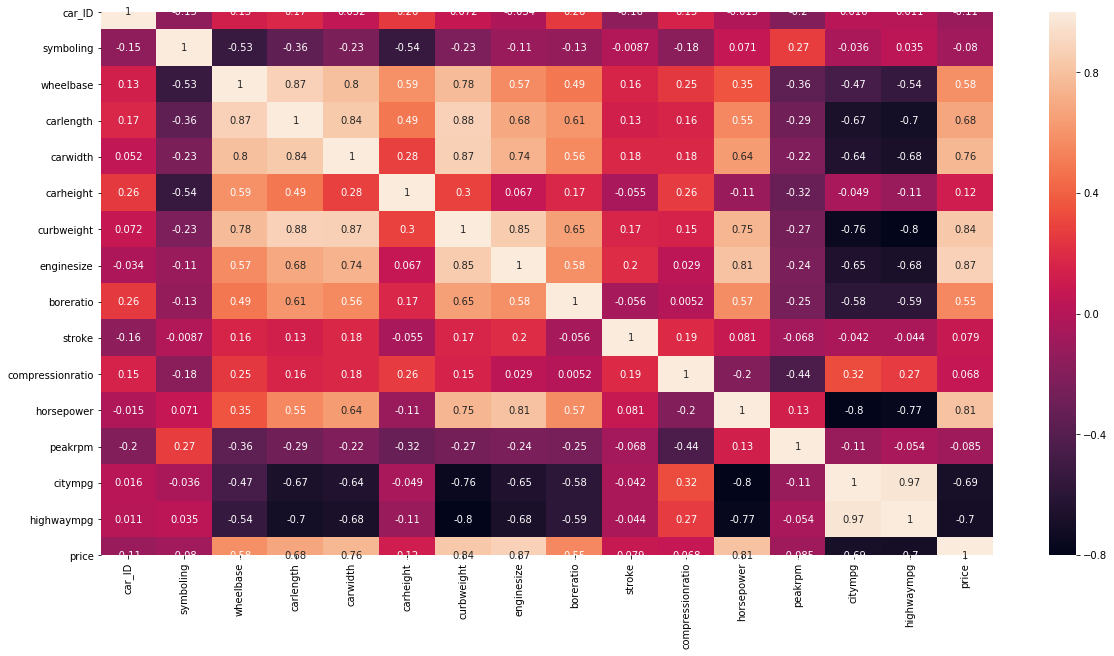

In [230]:
plt.figure(figsize = (20,10))  
sns.heatmap(auto_df.corr(),annot = True)

## Step 3 : Data Preparation

- We will drop the highwaympg column as the correlation is very high 97%

In [231]:
# Dropping the highwaympg column
auto_df.drop(['highwaympg'] ,axis = 1 , inplace = True)

We don't have any yes or no kind of categorical variables we just have variables with data so converting them into dummy variables

In [232]:
auto_df.fueltype.unique()

array(['gas', 'diesel'], dtype=object)

In [233]:
# Get the dummy variables for the feature 'fueltype' and store it in a new variable/series - 'Fueltype'
# since we know that we will need N-1 columns we will drop the first column
Fueltype_df = pd.get_dummies(auto_df['fueltype'] ,drop_first = True)

In [234]:
# check the column name created for it
Fueltype_df.head()

,gas
0,1
1,1
2,1
3,1
4,1


- so if fueltype is gas the value will be 1 and for diesel it will be 0

In [235]:
# appending the column gas at the end
auto_df = pd.concat([auto_df,Fueltype_df],axis = 1)

In [236]:
auto_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,price,CompanyName,gas
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,13495.0,alfa-romero,1
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,16500.0,alfa-romero,1
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,16500.0,alfa-romero,1
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,13950.0,audi,1
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,17450.0,audi,1


In [237]:
# Dropping the fueltype column as we have dummy variable gas for it
auto_df.drop(['fueltype'] ,axis = 1 , inplace = True)

In [238]:
# rename the new gas column to reflect the original column description
auto_df.rename(columns ={'gas':'fueltype_gas'},inplace = True)

In [239]:
auto_df.head()

,car_ID,symboling,CarName,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,price,CompanyName,fueltype_gas
0,1,3,alfa-romero giulia,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,13495.0,alfa-romero,1
1,2,3,alfa-romero stelvio,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,16500.0,alfa-romero,1
2,3,1,alfa-romero Quadrifoglio,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,16500.0,alfa-romero,1
3,4,2,audi 100 ls,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,13950.0,audi,1
4,5,2,audi 100ls,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,17450.0,audi,1


- Repeating the same process for other variables

In [240]:
auto_df.aspiration.unique()

array(['std', 'turbo'], dtype=object)

In [241]:
# Get the dummy variables for the feature 'Aspirtaion' and store it in a new variable/series - 'Aspiration_df'
# since we know that we will need N-1 columns we will drop the first column
Aspiration_df = pd.get_dummies(auto_df['aspiration'] ,drop_first = True)

In [242]:
# check the column name created for it
Aspiration_df.head()

,turbo
0,0
1,0
2,0
3,0
4,0


- so if aspiration is std the value will be 1 and for turbo it will be 0

In [243]:
# appending the column turbo at the end
auto_df = pd.concat([auto_df,Aspiration_df],axis = 1)

In [244]:
auto_df.head()

,car_ID,symboling,CarName,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,price,CompanyName,fueltype_gas,turbo
0,1,3,alfa-romero giulia,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,13495.0,alfa-romero,1,0
1,2,3,alfa-romero stelvio,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,16500.0,alfa-romero,1,0
2,3,1,alfa-romero Quadrifoglio,std,two,hatchback,rwd,front,94.5,171.2,...,2.68,3.47,9.0,154,5000,19,16500.0,alfa-romero,1,0
3,4,2,audi 100 ls,std,four,sedan,fwd,front,99.8,176.6,...,3.19,3.40,10.0,102,5500,24,13950.0,audi,1,0
4,5,2,audi 100ls,std,four,sedan,4wd,front,99.4,176.6,...,3.19,3.40,8.0,115,5500,18,17450.0,audi,1,0


In [245]:
# Dropping the original column as we have dummy variable for it
auto_df.drop(['aspiration'] ,axis = 1 , inplace = True)

In [246]:
# rename the new turbo column to reflect the original column description , giving the name which has the value as 1
auto_df.rename(columns ={'turbo':'asp_std'},inplace = True)

In [247]:
auto_df.head()

,car_ID,symboling,CarName,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,price,CompanyName,fueltype_gas,asp_std
0,1,3,alfa-romero giulia,two,convertible,rwd,front,88.6,168.8,64.1,...,3.47,2.68,9.0,111,5000,21,13495.0,alfa-romero,1,0
1,2,3,alfa-romero stelvio,two,convertible,rwd,front,88.6,168.8,64.1,...,3.47,2.68,9.0,111,5000,21,16500.0,alfa-romero,1,0
2,3,1,alfa-romero Quadrifoglio,two,hatchback,rwd,front,94.5,171.2,65.5,...,2.68,3.47,9.0,154,5000,19,16500.0,alfa-romero,1,0
3,4,2,audi 100 ls,four,sedan,fwd,front,99.8,176.6,66.2,...,3.19,3.40,10.0,102,5500,24,13950.0,audi,1,0
4,5,2,audi 100ls,four,sedan,4wd,front,99.4,176.6,66.4,...,3.19,3.40,8.0,115,5500,18,17450.0,audi,1,0


- Next categorical column

In [248]:
auto_df.doornumber.unique()

array(['two', 'four'], dtype=object)

In [249]:
# Get the dummy variables for the feature 'doornumber' and store it in a new variable/series - 'DoorNo_df'
# since we know that we will need N-1 columns we will drop the first column
DoorNo_df = pd.get_dummies(auto_df['doornumber'] ,drop_first = True)

In [250]:
# check the column name created for it
DoorNo_df.head()

,two
0,1
1,1
2,1
3,0
4,0


- So if the doornumber is two then we get 1 and for four we get 0

In [251]:
# appending the column two at the end
auto_df = pd.concat([auto_df,DoorNo_df],axis = 1)

In [252]:
auto_df.head()

,car_ID,symboling,CarName,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,stroke,compressionratio,horsepower,peakrpm,citympg,price,CompanyName,fueltype_gas,asp_std,two
0,1,3,alfa-romero giulia,two,convertible,rwd,front,88.6,168.8,64.1,...,2.68,9.0,111,5000,21,13495.0,alfa-romero,1,0,1
1,2,3,alfa-romero stelvio,two,convertible,rwd,front,88.6,168.8,64.1,...,2.68,9.0,111,5000,21,16500.0,alfa-romero,1,0,1
2,3,1,alfa-romero Quadrifoglio,two,hatchback,rwd,front,94.5,171.2,65.5,...,3.47,9.0,154,5000,19,16500.0,alfa-romero,1,0,1
3,4,2,audi 100 ls,four,sedan,fwd,front,99.8,176.6,66.2,...,3.40,10.0,102,5500,24,13950.0,audi,1,0,0
4,5,2,audi 100ls,four,sedan,4wd,front,99.4,176.6,66.4,...,3.40,8.0,115,5500,18,17450.0,audi,1,0,0


In [253]:
# Dropping the doornumber column as we have dummy variable two for it
auto_df.drop(['doornumber'] ,axis = 1 , inplace = True)

In [254]:
# rename the new two column to reflect the original column description
auto_df.rename(columns ={'two':'door_two'},inplace = True)

In [255]:
auto_df.head()

,car_ID,symboling,CarName,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,stroke,compressionratio,horsepower,peakrpm,citympg,price,CompanyName,fueltype_gas,asp_std,door_two
0,1,3,alfa-romero giulia,convertible,rwd,front,88.6,168.8,64.1,48.8,...,2.68,9.0,111,5000,21,13495.0,alfa-romero,1,0,1
1,2,3,alfa-romero stelvio,convertible,rwd,front,88.6,168.8,64.1,48.8,...,2.68,9.0,111,5000,21,16500.0,alfa-romero,1,0,1
2,3,1,alfa-romero Quadrifoglio,hatchback,rwd,front,94.5,171.2,65.5,52.4,...,3.47,9.0,154,5000,19,16500.0,alfa-romero,1,0,1
3,4,2,audi 100 ls,sedan,fwd,front,99.8,176.6,66.2,54.3,...,3.40,10.0,102,5500,24,13950.0,audi,1,0,0
4,5,2,audi 100ls,sedan,4wd,front,99.4,176.6,66.4,54.3,...,3.40,8.0,115,5500,18,17450.0,audi,1,0,0


- next categorical column

In [256]:
auto_df.carbody.unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [257]:
# Get the dummy variables for the feature 'carbody' and store it in a new variable/series - 'Carbody_df'
# since we know that we will need N-1 columns we will drop the first column
Carbody_df = pd.get_dummies(auto_df['carbody'] ,drop_first = True)

In [258]:
# check the column name created for it
Carbody_df.head()

,hardtop,hatchback,sedan,wagon
0,0,0,0,0
1,0,0,0,0
2,0,1,0,0
3,0,0,1,0
4,0,0,1,0


- So if all the columns are zero than it is convertible else whatever the column has 1 assigned to it.

In [259]:
# appending the dummy columns at the end
auto_df = pd.concat([auto_df,Carbody_df],axis = 1)

In [260]:
auto_df.head()

,car_ID,symboling,CarName,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,citympg,price,CompanyName,fueltype_gas,asp_std,door_two,hardtop,hatchback,sedan,wagon
0,1,3,alfa-romero giulia,convertible,rwd,front,88.6,168.8,64.1,48.8,...,21,13495.0,alfa-romero,1,0,1,0,0,0,0
1,2,3,alfa-romero stelvio,convertible,rwd,front,88.6,168.8,64.1,48.8,...,21,16500.0,alfa-romero,1,0,1,0,0,0,0
2,3,1,alfa-romero Quadrifoglio,hatchback,rwd,front,94.5,171.2,65.5,52.4,...,19,16500.0,alfa-romero,1,0,1,0,1,0,0
3,4,2,audi 100 ls,sedan,fwd,front,99.8,176.6,66.2,54.3,...,24,13950.0,audi,1,0,0,0,0,1,0
4,5,2,audi 100ls,sedan,4wd,front,99.4,176.6,66.4,54.3,...,18,17450.0,audi,1,0,0,0,0,1,0


In [261]:
# Dropping the Carbody column as we have dummy variables for it
auto_df.drop(['carbody'] ,axis = 1 , inplace = True)

In [262]:
# rename the new  columns to reflect the original column description
auto_df.rename(columns ={'hardtop':'carbody_hardtop','sedan':'carbody_sedan'
                         ,'hatchback':'carbody_hatchback','wagon':'carbody_wagon'},inplace = True)

In [263]:
auto_df.head()

,car_ID,symboling,CarName,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,citympg,price,CompanyName,fueltype_gas,asp_std,door_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon
0,1,3,alfa-romero giulia,rwd,front,88.6,168.8,64.1,48.8,2548,...,21,13495.0,alfa-romero,1,0,1,0,0,0,0
1,2,3,alfa-romero stelvio,rwd,front,88.6,168.8,64.1,48.8,2548,...,21,16500.0,alfa-romero,1,0,1,0,0,0,0
2,3,1,alfa-romero Quadrifoglio,rwd,front,94.5,171.2,65.5,52.4,2823,...,19,16500.0,alfa-romero,1,0,1,0,1,0,0
3,4,2,audi 100 ls,fwd,front,99.8,176.6,66.2,54.3,2337,...,24,13950.0,audi,1,0,0,0,0,1,0
4,5,2,audi 100ls,4wd,front,99.4,176.6,66.4,54.3,2824,...,18,17450.0,audi,1,0,0,0,0,1,0


- Next Categorical Column 

In [264]:
auto_df.drivewheel.unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [265]:
# Get the dummy variables for the feature 'drivewheel' and store it in a new variable/series - 'Drivewheel_df'
# since we know that we will need N-1 columns we will drop the first column
Drivewheel_df = pd.get_dummies(auto_df['drivewheel'] ,drop_first = True)

In [266]:
# check the column name created for it
Drivewheel_df.head()

,fwd,rwd
0,0,1
1,0,1
2,0,1
3,1,0
4,0,0


- So if both the columns are 0 than it is 4wd else whatever column has 1 selected

In [267]:
# appending the dummy column at the end
auto_df = pd.concat([auto_df,Drivewheel_df],axis = 1)

In [268]:
auto_df.head()

,car_ID,symboling,CarName,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,CompanyName,fueltype_gas,asp_std,door_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,fwd,rwd
0,1,3,alfa-romero giulia,rwd,front,88.6,168.8,64.1,48.8,2548,...,alfa-romero,1,0,1,0,0,0,0,0,1
1,2,3,alfa-romero stelvio,rwd,front,88.6,168.8,64.1,48.8,2548,...,alfa-romero,1,0,1,0,0,0,0,0,1
2,3,1,alfa-romero Quadrifoglio,rwd,front,94.5,171.2,65.5,52.4,2823,...,alfa-romero,1,0,1,0,1,0,0,0,1
3,4,2,audi 100 ls,fwd,front,99.8,176.6,66.2,54.3,2337,...,audi,1,0,0,0,0,1,0,1,0
4,5,2,audi 100ls,4wd,front,99.4,176.6,66.4,54.3,2824,...,audi,1,0,0,0,0,1,0,0,0


In [269]:
# Dropping the original column as we have dummy variable for it
auto_df.drop(['drivewheel'] ,axis = 1 , inplace = True)

In [270]:
# rename the new  columns to reflect the original column description
auto_df.rename(columns ={'fwd':'drwhl_fwd','rwd':'drwhl_rwd'},inplace = True)

In [271]:
auto_df.head()

,car_ID,symboling,CarName,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,...,CompanyName,fueltype_gas,asp_std,door_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drwhl_fwd,drwhl_rwd
0,1,3,alfa-romero giulia,front,88.6,168.8,64.1,48.8,2548,dohc,...,alfa-romero,1,0,1,0,0,0,0,0,1
1,2,3,alfa-romero stelvio,front,88.6,168.8,64.1,48.8,2548,dohc,...,alfa-romero,1,0,1,0,0,0,0,0,1
2,3,1,alfa-romero Quadrifoglio,front,94.5,171.2,65.5,52.4,2823,ohcv,...,alfa-romero,1,0,1,0,1,0,0,0,1
3,4,2,audi 100 ls,front,99.8,176.6,66.2,54.3,2337,ohc,...,audi,1,0,0,0,0,1,0,1,0
4,5,2,audi 100ls,front,99.4,176.6,66.4,54.3,2824,ohc,...,audi,1,0,0,0,0,1,0,0,0


- Next Categorical Column

In [272]:
auto_df.enginelocation.unique()

array(['front', 'rear'], dtype=object)

In [273]:
# Get the dummy variables for the feature 'enginelocation' and store it in a new variable/series - 'Enginelocation_df'
# since we know that we will need N-1 columns we will drop the first column
Enginelocation_df = pd.get_dummies(auto_df['enginelocation'] ,drop_first = True)

In [274]:
# check the column name created for it
Enginelocation_df.head()

,rear
0,0
1,0
2,0
3,0
4,0


- So if the rear is 0 then it is rear else for 1we have front

In [275]:
# appending the dummy column at the end
auto_df = pd.concat([auto_df,Enginelocation_df],axis = 1)

In [276]:
auto_df.head()

,car_ID,symboling,CarName,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,...,fueltype_gas,asp_std,door_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drwhl_fwd,drwhl_rwd,rear
0,1,3,alfa-romero giulia,front,88.6,168.8,64.1,48.8,2548,dohc,...,1,0,1,0,0,0,0,0,1,0
1,2,3,alfa-romero stelvio,front,88.6,168.8,64.1,48.8,2548,dohc,...,1,0,1,0,0,0,0,0,1,0
2,3,1,alfa-romero Quadrifoglio,front,94.5,171.2,65.5,52.4,2823,ohcv,...,1,0,1,0,1,0,0,0,1,0
3,4,2,audi 100 ls,front,99.8,176.6,66.2,54.3,2337,ohc,...,1,0,0,0,0,1,0,1,0,0
4,5,2,audi 100ls,front,99.4,176.6,66.4,54.3,2824,ohc,...,1,0,0,0,0,1,0,0,0,0


In [277]:
# Dropping the original column as we have dummy variable for it
auto_df.drop(['enginelocation'] ,axis = 1 , inplace = True)

In [278]:
# rename the new  columns to reflect the original column description
auto_df.rename(columns ={'rear':'eng_loc_front'},inplace = True)

In [279]:
auto_df.head()

,car_ID,symboling,CarName,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,...,fueltype_gas,asp_std,door_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drwhl_fwd,drwhl_rwd,eng_loc_front
0,1,3,alfa-romero giulia,88.6,168.8,64.1,48.8,2548,dohc,four,...,1,0,1,0,0,0,0,0,1,0
1,2,3,alfa-romero stelvio,88.6,168.8,64.1,48.8,2548,dohc,four,...,1,0,1,0,0,0,0,0,1,0
2,3,1,alfa-romero Quadrifoglio,94.5,171.2,65.5,52.4,2823,ohcv,six,...,1,0,1,0,1,0,0,0,1,0
3,4,2,audi 100 ls,99.8,176.6,66.2,54.3,2337,ohc,four,...,1,0,0,0,0,1,0,1,0,0
4,5,2,audi 100ls,99.4,176.6,66.4,54.3,2824,ohc,five,...,1,0,0,0,0,1,0,0,0,0


- Next Categorical column

In [280]:
auto_df.enginetype.unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [281]:
# Get the dummy variables for the feature 'enginetype' and store it in a new variable/series - 'Enginetype_df'
# since we know that we will need N-1 columns we will drop the first column
Enginetype_df = pd.get_dummies(auto_df['enginetype'],drop_first = True )

In [282]:
# check the column name created for it
Enginetype_df.head()

,dohcv,l,ohc,ohcf,ohcv,rotor
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,1,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0


- So if  all the columns are zero than int is dohc , otherwise it is the column with the 1 selected

In [283]:
# appending the dummy column at the end
auto_df = pd.concat([auto_df,Enginetype_df],axis = 1)

In [284]:
auto_df.head()

,car_ID,symboling,CarName,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,...,carbody_wagon,drwhl_fwd,drwhl_rwd,eng_loc_front,dohcv,l,ohc,ohcf,ohcv,rotor
0,1,3,alfa-romero giulia,88.6,168.8,64.1,48.8,2548,dohc,four,...,0,0,1,0,0,0,0,0,0,0
1,2,3,alfa-romero stelvio,88.6,168.8,64.1,48.8,2548,dohc,four,...,0,0,1,0,0,0,0,0,0,0
2,3,1,alfa-romero Quadrifoglio,94.5,171.2,65.5,52.4,2823,ohcv,six,...,0,0,1,0,0,0,0,0,1,0
3,4,2,audi 100 ls,99.8,176.6,66.2,54.3,2337,ohc,four,...,0,1,0,0,0,0,1,0,0,0
4,5,2,audi 100ls,99.4,176.6,66.4,54.3,2824,ohc,five,...,0,0,0,0,0,0,1,0,0,0


In [285]:
# Dropping the original column as we have dummy variable for it
auto_df.drop(['enginetype'] ,axis = 1 , inplace = True)

In [286]:
# rename the new  columns to reflect the original column description
auto_df.rename(columns ={'dohcv':'eng_typ_dohcv','l':'eng_typ_l','ohc':'eng_typ_ohc'
                         ,'ohcf':'eng_typ_ohcf','ohcv':'eng_typ_ohcv','rotor':'eng_typ_rotor'},inplace = True)

In [287]:
auto_df.head()

,car_ID,symboling,CarName,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,...,carbody_wagon,drwhl_fwd,drwhl_rwd,eng_loc_front,eng_typ_dohcv,eng_typ_l,eng_typ_ohc,eng_typ_ohcf,eng_typ_ohcv,eng_typ_rotor
0,1,3,alfa-romero giulia,88.6,168.8,64.1,48.8,2548,four,130,...,0,0,1,0,0,0,0,0,0,0
1,2,3,alfa-romero stelvio,88.6,168.8,64.1,48.8,2548,four,130,...,0,0,1,0,0,0,0,0,0,0
2,3,1,alfa-romero Quadrifoglio,94.5,171.2,65.5,52.4,2823,six,152,...,0,0,1,0,0,0,0,0,1,0
3,4,2,audi 100 ls,99.8,176.6,66.2,54.3,2337,four,109,...,0,1,0,0,0,0,1,0,0,0
4,5,2,audi 100ls,99.4,176.6,66.4,54.3,2824,five,136,...,0,0,0,0,0,0,1,0,0,0


- Next Categorical Column

In [288]:
auto_df.cylindernumber.unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [289]:
# Get the dummy variables for the feature 'cylindernumber' and store it in a new variable/series - 'Cylindernumber_df'
# since we know that we will need N-1 columns we will drop the first column
Cylindernumber_df = pd.get_dummies(auto_df['cylindernumber'],drop_first = True )

In [290]:
# check the column name created for it
Cylindernumber_df.head()

,five,four,six,three,twelve,two
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,0,1,0,0,0
3,0,1,0,0,0,0
4,1,0,0,0,0,0


- So if all the columns are 0 than we have 8cyl other wise it's the column with value 1

In [291]:
# appending the dummy column at the end
auto_df = pd.concat([auto_df,Cylindernumber_df],axis = 1)

In [292]:
auto_df.head()

,car_ID,symboling,CarName,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,...,eng_typ_ohc,eng_typ_ohcf,eng_typ_ohcv,eng_typ_rotor,five,four,six,three,twelve,two
0,1,3,alfa-romero giulia,88.6,168.8,64.1,48.8,2548,four,130,...,0,0,0,0,0,1,0,0,0,0
1,2,3,alfa-romero stelvio,88.6,168.8,64.1,48.8,2548,four,130,...,0,0,0,0,0,1,0,0,0,0
2,3,1,alfa-romero Quadrifoglio,94.5,171.2,65.5,52.4,2823,six,152,...,0,0,1,0,0,0,1,0,0,0
3,4,2,audi 100 ls,99.8,176.6,66.2,54.3,2337,four,109,...,1,0,0,0,0,1,0,0,0,0
4,5,2,audi 100ls,99.4,176.6,66.4,54.3,2824,five,136,...,1,0,0,0,1,0,0,0,0,0


In [293]:
# Dropping the original eltype column as we have dummy variable for it
auto_df.drop(['cylindernumber'] ,axis = 1 , inplace = True)

In [294]:
# rename the new  columns to reflect the original column description
auto_df.rename(columns ={'five':'cyl_five','four':'cyl_four','six':'cyl_six',
                        'three':'cyl_three','twelve':'cyl_twelve','two':'cyl_two'},inplace = True)

In [295]:
auto_df.head()

,car_ID,symboling,CarName,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,fuelsystem,...,eng_typ_ohc,eng_typ_ohcf,eng_typ_ohcv,eng_typ_rotor,cyl_five,cyl_four,cyl_six,cyl_three,cyl_twelve,cyl_two
0,1,3,alfa-romero giulia,88.6,168.8,64.1,48.8,2548,130,mpfi,...,0,0,0,0,0,1,0,0,0,0
1,2,3,alfa-romero stelvio,88.6,168.8,64.1,48.8,2548,130,mpfi,...,0,0,0,0,0,1,0,0,0,0
2,3,1,alfa-romero Quadrifoglio,94.5,171.2,65.5,52.4,2823,152,mpfi,...,0,0,1,0,0,0,1,0,0,0
3,4,2,audi 100 ls,99.8,176.6,66.2,54.3,2337,109,mpfi,...,1,0,0,0,0,1,0,0,0,0
4,5,2,audi 100ls,99.4,176.6,66.4,54.3,2824,136,mpfi,...,1,0,0,0,1,0,0,0,0,0


- Next Categorical Variable

In [296]:
auto_df.fuelsystem.unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

In [297]:
# Get the dummy variables for the feature 'fuelsystem' and store it in a new variable/series - 'Fuelsystem_df'
# since we know that we will need N-1 columns we will drop the first column
Fuelsystem_df = pd.get_dummies(auto_df['fuelsystem'] ,drop_first = True)

In [298]:
# check the column name created for it
Fuelsystem_df.head()

,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0


- So if all are 0 than it is 1bbl  otherwise it is the column which is selected

In [299]:
# appending the dummy column at the end
auto_df = pd.concat([auto_df,Fuelsystem_df],axis = 1)

In [300]:
auto_df.head()

,car_ID,symboling,CarName,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,fuelsystem,...,cyl_three,cyl_twelve,cyl_two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,1,3,alfa-romero giulia,88.6,168.8,64.1,48.8,2548,130,mpfi,...,0,0,0,0,0,0,0,1,0,0
1,2,3,alfa-romero stelvio,88.6,168.8,64.1,48.8,2548,130,mpfi,...,0,0,0,0,0,0,0,1,0,0
2,3,1,alfa-romero Quadrifoglio,94.5,171.2,65.5,52.4,2823,152,mpfi,...,0,0,0,0,0,0,0,1,0,0
3,4,2,audi 100 ls,99.8,176.6,66.2,54.3,2337,109,mpfi,...,0,0,0,0,0,0,0,1,0,0
4,5,2,audi 100ls,99.4,176.6,66.4,54.3,2824,136,mpfi,...,0,0,0,0,0,0,0,1,0,0


In [301]:
# Dropping the original column as we have dummy variable for it
auto_df.drop(['fuelsystem'] ,axis = 1 , inplace = True)

In [302]:
# rename the new  columns to reflect the original column description
auto_df.rename(columns ={'2bbl':'fuel_sys_2bbl','4bbl':'fuel_sys_4bbl','idi':'fuel_sys_idi',
                        'mfi':'fuel_sys_mfi','mpfi':'fuel_sys_mpfi'
                         ,'spdi':'fuel_sys_spdi','spfi':'fuel_sys_spfi'},inplace = True)

In [303]:
auto_df.head()

,car_ID,symboling,CarName,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,...,cyl_three,cyl_twelve,cyl_two,fuel_sys_2bbl,fuel_sys_4bbl,fuel_sys_idi,fuel_sys_mfi,fuel_sys_mpfi,fuel_sys_spdi,fuel_sys_spfi
0,1,3,alfa-romero giulia,88.6,168.8,64.1,48.8,2548,130,3.47,...,0,0,0,0,0,0,0,1,0,0
1,2,3,alfa-romero stelvio,88.6,168.8,64.1,48.8,2548,130,3.47,...,0,0,0,0,0,0,0,1,0,0
2,3,1,alfa-romero Quadrifoglio,94.5,171.2,65.5,52.4,2823,152,2.68,...,0,0,0,0,0,0,0,1,0,0
3,4,2,audi 100 ls,99.8,176.6,66.2,54.3,2337,109,3.19,...,0,0,0,0,0,0,0,1,0,0
4,5,2,audi 100ls,99.4,176.6,66.4,54.3,2824,136,3.19,...,0,0,0,0,0,0,0,1,0,0


- Last Categorical variable is the company name

In [304]:
auto_df.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [305]:
# Get the dummy variables for the feature 'CompanyName' and store it in a new variable/series - 'CompanyName_df'
# since we know that we will need N-1 columns we will drop the first column
CompanyName_df = pd.get_dummies(auto_df['CompanyName'] ,drop_first = True)

In [306]:
# check the column name created for it
CompanyName_df.head()

,alfa-romero,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,...,mitsubishi,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


- So if all the values are 0 than it is Nissan otherwise it is the companywith value 1 in it.

In [307]:
# appending the dummy columns at the end
auto_df = pd.concat([auto_df,CompanyName_df],axis = 1)

In [308]:
auto_df.head()

,car_ID,symboling,CarName,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,...,mitsubishi,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,1,3,alfa-romero giulia,88.6,168.8,64.1,48.8,2548,130,3.47,...,0,0,0,0,0,0,0,0,0,0
1,2,3,alfa-romero stelvio,88.6,168.8,64.1,48.8,2548,130,3.47,...,0,0,0,0,0,0,0,0,0,0
2,3,1,alfa-romero Quadrifoglio,94.5,171.2,65.5,52.4,2823,152,2.68,...,0,0,0,0,0,0,0,0,0,0
3,4,2,audi 100 ls,99.8,176.6,66.2,54.3,2337,109,3.19,...,0,0,0,0,0,0,0,0,0,0
4,5,2,audi 100ls,99.4,176.6,66.4,54.3,2824,136,3.19,...,0,0,0,0,0,0,0,0,0,0


In [309]:
# Dropping the Original column as we have dummy variables for it
auto_df.drop(['CompanyName'] ,axis = 1 , inplace = True)

In [310]:
### removing extra columns which we don't need now like , car_ID and CarName
auto_df.drop(['car_ID','CarName'] ,axis = 1 , inplace = True)

In [311]:
auto_df.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,mitsubishi,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,0,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,0,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,0,0,0,0,0,0,0,0,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,0,0,0,0,0,0,0,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0,0,0,0,0,0,0,0,0,0


## Step 4 : Splitting the data into Train and Test sets

In [312]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(auto_df, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling

In [313]:
from sklearn.preprocessing import MinMaxScaler

In [314]:
scaler = MinMaxScaler()

In [315]:
# apply minmax sacling to all numeric variables except the dummies which we just created
num_vars = ['price','wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio',
            'horsepower','peakrpm','citympg','symboling']

In [316]:
auto_df[num_vars].head()

,price,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,symboling
0,13495.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,3
1,16500.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,3
2,16500.0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,1
3,13950.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,2
4,17450.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,2


In [317]:
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [318]:
df_train[num_vars].head()

,price,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,symboling
122,0.068818,0.244828,0.426016,0.291667,0.265487,0.272692,0.139623,0.230159,0.525253,0.15000,0.083333,0.551020,0.500000,0.6
125,0.466890,0.272414,0.452033,0.666667,0.212389,0.500388,0.339623,1.000000,0.464646,0.15625,0.395833,0.551020,0.166667,1.0
166,0.122110,0.272414,0.448780,0.308333,0.424779,0.314973,0.139623,0.444444,0.449495,0.15000,0.266667,1.000000,0.361111,0.6
1,0.314446,0.068966,0.450407,0.316667,0.088496,0.411171,0.260377,0.626984,0.247475,0.12500,0.262500,0.346939,0.222222,1.0
199,0.382131,0.610345,0.775610,0.575000,0.858407,0.647401,0.260377,0.746032,0.484848,0.03125,0.475000,0.387755,0.111111,0.2


In [319]:
df_train[num_vars].describe()

,price,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,symboling
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.219310,0.411141,0.525476,0.461655,0.509004,0.407878,0.241351,0.497946,0.535389,0.190787,0.227302,0.400029,0.344211,0.559441
std,0.215682,0.205581,0.204848,0.184517,0.215378,0.211269,0.154619,0.207140,0.157843,0.237181,0.165511,0.196438,0.186165,0.239200
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.067298,0.272414,0.399187,0.304167,0.353982,0.245539,0.135849,0.305556,0.464646,0.100000,0.091667,0.265306,0.166667,0.400000
50%,0.140343,0.341379,0.502439,0.425000,0.522124,0.355702,0.184906,0.500000,0.545455,0.125000,0.191667,0.428571,0.333333,0.600000
75%,0.313479,0.503448,0.669919,0.550000,0.668142,0.559542,0.301887,0.682540,0.611111,0.150000,0.283333,0.551020,0.500000,0.600000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [320]:
df_train.shape

(143, 64)

### Dividing into X and Y sets for the model building

In [321]:
y_train = df_train.pop('price')

In [322]:
X_train = df_train

### RFE
- Recursive Feature Elimination

In [323]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [324]:
# Running RFE with the output number of the variable equal to 30
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 30)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [325]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 26),
 ('wheelbase', True, 1),
 ('carlength', True, 1),
 ('carwidth', True, 1),
 ('carheight', True, 1),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', False, 5),
 ('horsepower', True, 1),
 ('peakrpm', True, 1),
 ('citympg', False, 8),
 ('fueltype_gas', False, 9),
 ('asp_std', True, 1),
 ('door_two', False, 25),
 ('carbody_hardtop', False, 12),
 ('carbody_hatchback', False, 10),
 ('carbody_sedan', False, 13),
 ('carbody_wagon', False, 14),
 ('drwhl_fwd', False, 30),
 ('drwhl_rwd', False, 22),
 ('eng_loc_front', True, 1),
 ('eng_typ_dohcv', True, 1),
 ('eng_typ_l', True, 1),
 ('eng_typ_ohc', False, 23),
 ('eng_typ_ohcf', True, 1),
 ('eng_typ_ohcv', False, 20),
 ('eng_typ_rotor', True, 1),
 ('cyl_five', True, 1),
 ('cyl_four', True, 1),
 ('cyl_six', False, 6),
 ('cyl_three', True, 1),
 ('cyl_twelve', True, 1),
 ('cyl_two', True, 1),
 ('fuel_sys_2bbl', False, 24),
 ('fuel_sys_4bbl', False, 11),


In [326]:
col = X_train.columns[rfe.support_]
col

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'horsepower', 'peakrpm', 'asp_std',
       'eng_loc_front', 'eng_typ_dohcv', 'eng_typ_l', 'eng_typ_ohcf',
       'eng_typ_rotor', 'cyl_five', 'cyl_four', 'cyl_three', 'cyl_twelve',
       'cyl_two', 'bmw', 'dodge', 'mitsubishi', 'peugeot', 'plymouth',
       'porsche', 'saab', 'subaru', 'volvo'],
      dtype='object')

In [327]:
# columns which are removed by the RFE
X_train.columns[~rfe.support_]

Index(['symboling', 'compressionratio', 'citympg', 'fueltype_gas', 'door_two',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drwhl_fwd', 'drwhl_rwd', 'eng_typ_ohc',
       'eng_typ_ohcv', 'cyl_six', 'fuel_sys_2bbl', 'fuel_sys_4bbl',
       'fuel_sys_idi', 'fuel_sys_mfi', 'fuel_sys_mpfi', 'fuel_sys_spdi',
       'fuel_sys_spfi', 'alfa-romero', 'audi', 'buick', 'chevrolet', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercury', 'renault', 'toyota',
       'volkswagen'],
      dtype='object')

## Step 5: Building a linear model


In [328]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

- A model with all the columns

In [329]:
# Creating the RFE data frame with columns selected by RFE
X_train_rfe = X_train[col]

In [330]:
X_train_lm = sm.add_constant(X_train_rfe)

lr = sm.OLS(y_train, X_train_lm).fit()

In [331]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     108.7
Date:                Sun, 16 Feb 2020   Prob (F-statistic):           1.94e-69
Time:                        20:40:31   Log-Likelihood:                 251.35
No. Observations:                 143   AIC:                            -446.7
Df Residuals:                     115   BIC:                            -363.7
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.2682      0.045     -6.019      0.000      -0.356      -0.180
wheelbase         0.1030      0.060      1.728      0.087      -0.015       0.221
carlength        -0.0197      0.072     -0.274      0.785      -0.162       0.123
carwidth          0.2178      0.067      3.230      0.002       0.084       0.351
carheight        -0.0991      0.036     -2.754      0.007      -0.170      -0.028
curbweight        0.2813      0.091      3.094      0.002       0.101       0.461
enginesize        1.7222      0.182      9.461      0.000       1.362       2.083
boreratio        -0.4815      0.071     -6.751      0.000      -0.623      -0.340
stroke           -0.2845      0.045     -6.358      0.000      -0.373      -0.196
horsepower       -0.1439      0.097     -1.481      0.141      -0.336       0.049
peakrpm           0.0855      0.034      2.527      0.013       0.018       0.153
asp_std           0.0817      0.018      4.608      0.000       0.047       0.117
eng_loc_front     0.2179      0.052      4.208      0.000       0.115       0.320
eng_typ_dohcv     0.1364      0.077      1.763      0.081      -0.017       0.290
eng_typ_l         0.1336      0.026      5.163      0.000       0.082       0.185
eng_typ_ohcf      0.1274      0.026      4.878      0.000       0.076       0.179
eng_typ_rotor     0.2902      0.037      7.821      0.000       0.217       0.364
cyl_five          0.1978      0.035      5.654      0.000       0.128       0.267
cyl_four          0.2828      0.042      6.777      0.000       0.200       0.365
cyl_three         0.3518      0.047      7.506      0.000       0.259       0.445
cyl_twelve       -0.5859      0.093     -6.285      0.000      -0.770      -0.401
cyl_two           0.2902      0.037      7.821      0.000       0.217       0.364
bmw               0.3182      0.025     12.761      0.000       0.269       0.368
dodge            -0.0658      0.023     -2.812      0.006      -0.112      -0.019
mitsubishi       -0.1054      0.020     -5.300      0.000      -0.145      -0.066
peugeot          -0.2182      0.029     -7.459      0.000      -0.276      -0.160
plymouth         -0.0719      0.027     -2.637      0.010      -0.126      -0.018
porsche           0.2068      0.057      3.616      0.000       0.093       0.320
saab              0.1034      0.033      3.148      0.002       0.038       0.168
subaru           -0.0905      0.033     -2.757      0.007      -0.156      -0.025
volvo             0.0749      0.029      2.558      0.012       0.017       0.133
==============================================================================
Omnibus:                       46.041   Durbin-Watson:                   1.734
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              191.294
Skew:                           1.082   Prob(JB):         

In [332]:
# Removing the insignificant columns one by one : first carlength
X_train_rfe = X_train_rfe.drop(["carlength"], axis = 1)

In [333]:
# rebuilding the model without carlength
X_train_lm = sm.add_constant(X_train_rfe)

lr = sm.OLS(y_train, X_train_lm).fit()

In [334]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     113.8
Date:                Sun, 16 Feb 2020   Prob (F-statistic):           1.86e-70
Time:                        20:40:31   Log-Likelihood:                 251.30
No. Observations:                 143   AIC:                            -448.6
Df Residuals:                     116   BIC:                            -368.6
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.2702      0.044     -6.181      0.000      -0.357      -0.184
wheelbase         0.0965      0.055      1.769      0.080      -0.012       0.205
carwidth          0.2111      0.062      3.378      0.001       0.087       0.335
carheight        -0.1001      0.036     -2.807      0.006      -0.171      -0.029
curbweight        0.2713      0.083      3.276      0.001       0.107       0.435
enginesize        1.7413      0.167     10.399      0.000       1.410       2.073
boreratio        -0.4889      0.066     -7.444      0.000      -0.619      -0.359
stroke           -0.2860      0.044     -6.464      0.000      -0.374      -0.198
horsepower       -0.1476      0.096     -1.540      0.126      -0.337       0.042
peakrpm           0.0864      0.034      2.572      0.011       0.020       0.153
asp_std           0.0832      0.017      4.965      0.000       0.050       0.116
eng_loc_front     0.2144      0.050      4.290      0.000       0.115       0.313
eng_typ_dohcv     0.1403      0.076      1.852      0.067      -0.010       0.290
eng_typ_l         0.1357      0.025      5.508      0.000       0.087       0.185
eng_typ_ohcf      0.1266      0.026      4.897      0.000       0.075       0.178
eng_typ_rotor     0.2933      0.035      8.308      0.000       0.223       0.363
cyl_five          0.1995      0.034      5.826      0.000       0.132       0.267
cyl_four          0.2850      0.041      6.991      0.000       0.204       0.366
cyl_three         0.3544      0.046      7.745      0.000       0.264       0.445
cyl_twelve       -0.5917      0.090     -6.547      0.000      -0.771      -0.413
cyl_two           0.2933      0.035      8.308      0.000       0.223       0.363
bmw               0.3182      0.025     12.811      0.000       0.269       0.367
dodge            -0.0654      0.023     -2.812      0.006      -0.111      -0.019
mitsubishi       -0.1058      0.020     -5.350      0.000      -0.145      -0.067
peugeot          -0.2186      0.029     -7.517      0.000      -0.276      -0.161
plymouth         -0.0729      0.027     -2.709      0.008      -0.126      -0.020
porsche           0.2119      0.054      3.938      0.000       0.105       0.318
saab              0.1024      0.032      3.150      0.002       0.038       0.167
subaru           -0.0878      0.031     -2.818      0.006      -0.150      -0.026
volvo             0.0760      0.029      2.628      0.010       0.019       0.133
==============================================================================
Omnibus:                       45.847   Durbin-Watson:                   1.741
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              187.128
Skew:                           1.084   Prob(JB):                     2.32e-41
Kurtosis:                       8.168   Cond. No.            

- Dropping the varianble with very high p value : horsepower

In [335]:
X_train_rfe = X_train_rfe.drop(["horsepower"], axis = 1)

In [336]:
X_train_lm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_lm).fit()

In [337]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     116.9
Date:                Sun, 16 Feb 2020   Prob (F-statistic):           5.45e-71
Time:                        20:40:31   Log-Likelihood:                 249.85
No. Observations:                 143   AIC:                            -447.7
Df Residuals:                     117   BIC:                            -370.7
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.2876      0.042     -6.768      0.000      -0.372      -0.203
wheelbase         0.1072      0.054      1.969      0.051      -0.001       0.215
carwidth          0.2084      0.063      3.317      0.001       0.084       0.333
carheight        -0.0871      0.035     -2.499      0.014      -0.156      -0.018
curbweight        0.2310      0.079      2.922      0.004       0.074       0.387
enginesize        1.7357      0.168     10.308      0.000       1.402       2.069
boreratio        -0.5204      0.063     -8.289      0.000      -0.645      -0.396
stroke           -0.2864      0.045     -6.435      0.000      -0.375      -0.198
peakrpm           0.0536      0.026      2.050      0.043       0.002       0.105
asp_std           0.0705      0.015      4.801      0.000       0.041       0.100
eng_loc_front     0.2045      0.050      4.103      0.000       0.106       0.303
eng_typ_dohcv     0.0909      0.069      1.317      0.191      -0.046       0.228
eng_typ_l         0.1476      0.024      6.267      0.000       0.101       0.194
eng_typ_ohcf      0.1244      0.026      4.793      0.000       0.073       0.176
eng_typ_rotor     0.3089      0.034      9.085      0.000       0.242       0.376
cyl_five          0.2199      0.032      6.921      0.000       0.157       0.283
cyl_four          0.3120      0.037      8.426      0.000       0.239       0.385
cyl_three         0.3716      0.045      8.326      0.000       0.283       0.460
cyl_twelve       -0.6323      0.087     -7.272      0.000      -0.805      -0.460
cyl_two           0.3089      0.034      9.085      0.000       0.242       0.376
bmw               0.3175      0.025     12.712      0.000       0.268       0.367
dodge            -0.0605      0.023     -2.611      0.010      -0.106      -0.015
mitsubishi       -0.1040      0.020     -5.237      0.000      -0.143      -0.065
peugeot          -0.2240      0.029     -7.712      0.000      -0.282      -0.166
plymouth         -0.0665      0.027     -2.487      0.014      -0.119      -0.014
porsche           0.2117      0.054      3.912      0.000       0.105       0.319
saab              0.0943      0.032      2.924      0.004       0.030       0.158
subaru           -0.0801      0.031     -2.589      0.011      -0.141      -0.019
volvo             0.0838      0.029      2.926      0.004       0.027       0.141
==============================================================================
Omnibus:                       43.287   Durbin-Watson:                   1.807
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              157.199
Skew:                           1.059   Prob(JB):                     7.32e-35
Kurtosis:                       7.680   Cond. No.                     1.22e+16
================================================================

- Dropping the varianble with very high p value : eng_typ_dohcv

In [338]:
X_train_rfe = X_train_rfe.drop(["eng_typ_dohcv"], axis = 1)

In [339]:
X_train_lm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     121.0
Date:                Sun, 16 Feb 2020   Prob (F-statistic):           1.15e-71
Time:                        20:40:32   Log-Likelihood:                 248.80
No. Observations:                 143   AIC:                            -447.6
Df Residuals:                     118   BIC:                            -373.5
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.2830      0.042     -6.661      0.000      -0.367      -0.199
wheelbase         0.1012      0.054      1.859      0.065      -0.007       0.209
carwidth          0.2226      0.062      3.585      0.000       0.100       0.346
carheight        -0.0834      0.035     -2.395      0.018      -0.152      -0.014
curbweight        0.2256      0.079      2.850      0.005       0.069       0.382
enginesize        1.7117      0.168     10.193      0.000       1.379       2.044
boreratio        -0.5108      0.063     -8.166      0.000      -0.635      -0.387
stroke           -0.2848      0.045     -6.382      0.000      -0.373      -0.196
peakrpm           0.0544      0.026      2.077      0.040       0.003       0.106
asp_std           0.0705      0.015      4.782      0.000       0.041       0.100
eng_loc_front     0.1763      0.045      3.906      0.000       0.087       0.266
eng_typ_l         0.1447      0.024      6.153      0.000       0.098       0.191
eng_typ_ohcf      0.1093      0.023      4.682      0.000       0.063       0.155
eng_typ_rotor     0.3023      0.034      8.961      0.000       0.235       0.369
cyl_five          0.2116      0.031      6.774      0.000       0.150       0.274
cyl_four          0.3022      0.036      8.306      0.000       0.230       0.374
cyl_three         0.3657      0.045      8.210      0.000       0.277       0.454
cyl_twelve       -0.6241      0.087     -7.174      0.000      -0.796      -0.452
cyl_two           0.3023      0.034      8.961      0.000       0.235       0.369
bmw               0.3143      0.025     12.604      0.000       0.265       0.364
dodge            -0.0586      0.023     -2.528      0.013      -0.105      -0.013
mitsubishi       -0.1024      0.020     -5.153      0.000      -0.142      -0.063
peugeot          -0.2210      0.029     -7.609      0.000      -0.279      -0.163
plymouth         -0.0644      0.027     -2.404      0.018      -0.117      -0.011
porsche           0.2498      0.046      5.443      0.000       0.159       0.341
saab              0.0925      0.032      2.862      0.005       0.028       0.157
subaru           -0.0670      0.029     -2.280      0.024      -0.125      -0.009
volvo             0.0809      0.029      2.823      0.006       0.024       0.138
==============================================================================
Omnibus:                       42.775   Durbin-Watson:                   1.842
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.616
Skew:                           1.062   Prob(JB):                     5.35e-33
Kurtosis:                       7.520   Cond. No.                     1.22e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of

- Dropping the varianble with very high p value : wheelbase

In [340]:
X_train_rfe = X_train_rfe.drop(["wheelbase"], axis = 1)

In [341]:
X_train_lm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     123.5
Date:                Sun, 16 Feb 2020   Prob (F-statistic):           5.53e-72
Time:                        20:40:32   Log-Likelihood:                 246.73
No. Observations:                 143   AIC:                            -445.5
Df Residuals:                     119   BIC:                            -374.4
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.2966      0.042     -7.016      0.000      -0.380      -0.213
carwidth          0.2761      0.056      4.968      0.000       0.166       0.386
carheight        -0.0578      0.032     -1.789      0.076      -0.122       0.006
curbweight        0.2550      0.078      3.253      0.001       0.100       0.410
enginesize        1.7085      0.170     10.072      0.000       1.373       2.044
boreratio        -0.5130      0.063     -8.120      0.000      -0.638      -0.388
stroke           -0.2711      0.044     -6.097      0.000      -0.359      -0.183
peakrpm           0.0492      0.026      1.870      0.064      -0.003       0.101
asp_std           0.0640      0.014      4.423      0.000       0.035       0.093
eng_loc_front     0.1760      0.046      3.860      0.000       0.086       0.266
eng_typ_l         0.1525      0.023      6.524      0.000       0.106       0.199
eng_typ_ohcf      0.1119      0.024      4.753      0.000       0.065       0.158
eng_typ_rotor     0.3039      0.034      8.920      0.000       0.236       0.371
cyl_five          0.2139      0.032      6.780      0.000       0.151       0.276
cyl_four          0.3027      0.037      8.236      0.000       0.230       0.376
cyl_three         0.3622      0.045      8.055      0.000       0.273       0.451
cyl_twelve       -0.6282      0.088     -7.149      0.000      -0.802      -0.454
cyl_two           0.3039      0.034      8.920      0.000       0.236       0.371
bmw               0.3228      0.025     13.032      0.000       0.274       0.372
dodge            -0.0504      0.023     -2.192      0.030      -0.096      -0.005
mitsubishi       -0.0991      0.020     -4.955      0.000      -0.139      -0.059
peugeot          -0.2097      0.029     -7.308      0.000      -0.266      -0.153
plymouth         -0.0575      0.027     -2.145      0.034      -0.111      -0.004
porsche           0.2295      0.045      5.096      0.000       0.140       0.319
saab              0.0892      0.033      2.735      0.007       0.025       0.154
subaru           -0.0641      0.030     -2.163      0.033      -0.123      -0.005
volvo             0.0949      0.028      3.397      0.001       0.040       0.150
==============================================================================
Omnibus:                       41.618   Durbin-Watson:                   1.846
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              131.571
Skew:                           1.068   Prob(JB):                     2.69e-29
Kurtosis:                       7.186   Cond. No.                     1.23e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.87e-30. This 

- Dropping the varianble with very high p value : carheight

In [342]:
X_train_rfe = X_train_rfe.drop(["carheight"], axis = 1)

In [343]:
X_train_lm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     126.7
Date:                Sun, 16 Feb 2020   Prob (F-statistic):           2.32e-72
Time:                        20:40:32   Log-Likelihood:                 244.84
No. Observations:                 143   AIC:                            -443.7
Df Residuals:                     120   BIC:                            -375.5
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.3210      0.040     -7.947      0.000      -0.401      -0.241
carwidth          0.2674      0.056      4.786      0.000       0.157       0.378
curbweight        0.1961      0.072      2.731      0.007       0.054       0.338
enginesize        1.7973      0.164     10.978      0.000       1.473       2.121
boreratio        -0.5036      0.064     -7.926      0.000      -0.629      -0.378
stroke           -0.2851      0.044     -6.454      0.000      -0.373      -0.198
peakrpm           0.0600      0.026      2.319      0.022       0.009       0.111
asp_std           0.0695      0.014      4.876      0.000       0.041       0.098
eng_loc_front     0.1604      0.045      3.552      0.001       0.071       0.250
eng_typ_l         0.1493      0.024      6.347      0.000       0.103       0.196
eng_typ_ohcf      0.1021      0.023      4.419      0.000       0.056       0.148
eng_typ_rotor     0.3193      0.033      9.600      0.000       0.253       0.385
cyl_five          0.2105      0.032      6.627      0.000       0.148       0.273
cyl_four          0.3007      0.037      8.112      0.000       0.227       0.374
cyl_three         0.3622      0.045      7.983      0.000       0.272       0.452
cyl_twelve       -0.6349      0.089     -7.168      0.000      -0.810      -0.460
cyl_two           0.3193      0.033      9.600      0.000       0.253       0.385
bmw               0.3120      0.024     12.871      0.000       0.264       0.360
dodge            -0.0376      0.022     -1.704      0.091      -0.081       0.006
mitsubishi       -0.0862      0.019     -4.579      0.000      -0.123      -0.049
peugeot          -0.2129      0.029     -7.369      0.000      -0.270      -0.156
plymouth         -0.0434      0.026     -1.680      0.096      -0.095       0.008
porsche           0.2370      0.045      5.237      0.000       0.147       0.327
saab              0.0791      0.032      2.441      0.016       0.015       0.143
subaru           -0.0583      0.030     -1.962      0.052      -0.117       0.001
volvo             0.0836      0.027      3.044      0.003       0.029       0.138
==============================================================================
Omnibus:                       40.129   Durbin-Watson:                   1.850
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              126.170
Skew:                           1.027   Prob(JB):                     4.00e-28
Kurtosis:                       7.118   Cond. No.                     1.26e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.5e-30. This might indicate that there are
strong multicollinearity problems or that the design 

- Dropping the varianble with very high p value : plymouth

In [344]:
X_train_rfe = X_train_rfe.drop(["plymouth"], axis = 1)

In [345]:
X_train_lm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     130.6
Date:                Sun, 16 Feb 2020   Prob (F-statistic):           8.00e-73
Time:                        20:40:32   Log-Likelihood:                 243.17
No. Observations:                 143   AIC:                            -442.3
Df Residuals:                     121   BIC:                            -377.2
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.3190      0.041     -7.844      0.000      -0.400      -0.239
carwidth          0.2752      0.056      4.907      0.000       0.164       0.386
curbweight        0.1986      0.072      2.746      0.007       0.055       0.342
enginesize        1.7574      0.163     10.768      0.000       1.434       2.081
boreratio        -0.4825      0.063     -7.689      0.000      -0.607      -0.358
stroke           -0.2818      0.044     -6.337      0.000      -0.370      -0.194
peakrpm           0.0542      0.026      2.098      0.038       0.003       0.105
asp_std           0.0658      0.014      4.636      0.000       0.038       0.094
eng_loc_front     0.1658      0.045      3.654      0.000       0.076       0.256
eng_typ_l         0.1470      0.024      6.213      0.000       0.100       0.194
eng_typ_ohcf      0.1028      0.023      4.416      0.000       0.057       0.149
eng_typ_rotor     0.3128      0.033      9.398      0.000       0.247       0.379
cyl_five          0.2063      0.032      6.466      0.000       0.143       0.270
cyl_four          0.2916      0.037      7.892      0.000       0.218       0.365
cyl_three         0.3595      0.046      7.870      0.000       0.269       0.450
cyl_twelve       -0.6196      0.089     -6.980      0.000      -0.795      -0.444
cyl_two           0.3128      0.033      9.398      0.000       0.247       0.379
bmw               0.3095      0.024     12.697      0.000       0.261       0.358
dodge            -0.0310      0.022     -1.417      0.159      -0.074       0.012
mitsubishi       -0.0814      0.019     -4.343      0.000      -0.119      -0.044
peugeot          -0.2125      0.029     -7.301      0.000      -0.270      -0.155
porsche           0.2298      0.045      5.063      0.000       0.140       0.320
saab              0.0782      0.033      2.395      0.018       0.014       0.143
subaru           -0.0631      0.030     -2.115      0.036      -0.122      -0.004
volvo             0.0814      0.028      2.946      0.004       0.027       0.136
==============================================================================
Omnibus:                       38.593   Durbin-Watson:                   1.851
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              114.907
Skew:                           1.005   Prob(JB):                     1.12e-25
Kurtosis:                       6.904   Cond. No.                     8.04e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.18e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

- Dropping the varianble with very high p value : dodge

In [346]:
X_train_rfe = X_train_rfe.drop(["dodge"], axis = 1)

In [347]:
X_train_lm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     135.9
Date:                Sun, 16 Feb 2020   Prob (F-statistic):           1.82e-73
Time:                        20:40:32   Log-Likelihood:                 242.00
No. Observations:                 143   AIC:                            -442.0
Df Residuals:                     122   BIC:                            -379.8
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.3194      0.041     -7.821      0.000      -0.400      -0.239
carwidth          0.2797      0.056      4.974      0.000       0.168       0.391
curbweight        0.2090      0.072      2.894      0.005       0.066       0.352
enginesize        1.7233      0.162     10.632      0.000       1.402       2.044
boreratio        -0.4681      0.062     -7.529      0.000      -0.591      -0.345
stroke           -0.2791      0.045     -6.257      0.000      -0.367      -0.191
peakrpm           0.0492      0.026      1.916      0.058      -0.002       0.100
asp_std           0.0611      0.014      4.410      0.000       0.034       0.089
eng_loc_front     0.1704      0.045      3.748      0.000       0.080       0.260
eng_typ_l         0.1459      0.024      6.143      0.000       0.099       0.193
eng_typ_ohcf      0.1039      0.023      4.451      0.000       0.058       0.150
eng_typ_rotor     0.3083      0.033      9.268      0.000       0.242       0.374
cyl_five          0.2041      0.032      6.377      0.000       0.141       0.267
cyl_four          0.2859      0.037      7.752      0.000       0.213       0.359
cyl_three         0.3592      0.046      7.831      0.000       0.268       0.450
cyl_twelve       -0.6077      0.089     -6.848      0.000      -0.783      -0.432
cyl_two           0.3083      0.033      9.268      0.000       0.242       0.374
bmw               0.3079      0.024     12.594      0.000       0.260       0.356
mitsubishi       -0.0767      0.019     -4.141      0.000      -0.113      -0.040
peugeot          -0.2134      0.029     -7.302      0.000      -0.271      -0.156
porsche           0.2253      0.045      4.955      0.000       0.135       0.315
saab              0.0776      0.033      2.366      0.020       0.013       0.142
subaru           -0.0664      0.030     -2.226      0.028      -0.126      -0.007
volvo             0.0802      0.028      2.891      0.005       0.025       0.135
==============================================================================
Omnibus:                       37.932   Durbin-Watson:                   1.858
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              107.251
Skew:                           1.008   Prob(JB):                     5.14e-24
Kurtosis:                       6.734   Cond. No.                     8.33e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.75e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

- Dropping the varianble with very high p value :peakrpm

In [348]:
X_train_rfe = X_train_rfe.drop(["peakrpm"], axis = 1)

In [349]:
X_train_lm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     139.8
Date:                Sun, 16 Feb 2020   Prob (F-statistic):           9.12e-74
Time:                        20:40:32   Log-Likelihood:                 239.88
No. Observations:                 143   AIC:                            -439.8
Df Residuals:                     123   BIC:                            -380.5
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.2868      0.038     -7.643      0.000      -0.361      -0.213
carwidth          0.2849      0.057      5.018      0.000       0.172       0.397
curbweight        0.2005      0.073      2.751      0.007       0.056       0.345
enginesize        1.7088      0.164     10.441      0.000       1.385       2.033
boreratio        -0.4784      0.063     -7.639      0.000      -0.602      -0.354
stroke           -0.2808      0.045     -6.229      0.000      -0.370      -0.192
asp_std           0.0593      0.014      4.244      0.000       0.032       0.087
eng_loc_front     0.1741      0.046      3.793      0.000       0.083       0.265
eng_typ_l         0.1414      0.024      5.920      0.000       0.094       0.189
eng_typ_ohcf      0.1040      0.024      4.405      0.000       0.057       0.151
eng_typ_rotor     0.3144      0.033      9.391      0.000       0.248       0.381
cyl_five          0.2046      0.032      6.324      0.000       0.141       0.269
cyl_four          0.2818      0.037      7.571      0.000       0.208       0.355
cyl_three         0.3527      0.046      7.628      0.000       0.261       0.444
cyl_twelve       -0.5974      0.090     -6.673      0.000      -0.775      -0.420
cyl_two           0.3144      0.033      9.391      0.000       0.248       0.381
bmw               0.3061      0.025     12.395      0.000       0.257       0.355
mitsubishi       -0.0719      0.019     -3.876      0.000      -0.109      -0.035
peugeot          -0.2114      0.030     -7.160      0.000      -0.270      -0.153
porsche           0.2427      0.045      5.390      0.000       0.154       0.332
saab              0.0860      0.033      2.620      0.010       0.021       0.151
subaru           -0.0702      0.030     -2.331      0.021      -0.130      -0.011
volvo             0.0883      0.028      3.190      0.002       0.034       0.143
==============================================================================
Omnibus:                       41.711   Durbin-Watson:                   1.906
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              123.214
Skew:                           1.099   Prob(JB):                     1.76e-27
Kurtosis:                       6.981   Cond. No.                     7.13e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.43e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### Now the p-values are within range let's check the VIF

In [350]:
# calculate the vif
x_train_vif = X_train_rfe

In [351]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train_vif.columns
vif['VIF'] = [variance_inflation_factor(x_train_vif.values, i) for i in range(x_train_vif.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,cyl_two,inf
20,subaru,inf
6,eng_loc_front,inf
7,eng_typ_l,inf
8,eng_typ_ohcf,inf
9,eng_typ_rotor,inf
17,peugeot,inf
12,cyl_three,inf
2,enginesize,111.34
1,curbweight,66.29


#### removing first the values with infinite VIF

- Dropping the variable with high VIF : cyl_two

In [352]:
X_train_rfe = X_train_rfe.drop(["cyl_two"], axis = 1)

In [353]:
X_train_lm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     139.8
Date:                Sun, 16 Feb 2020   Prob (F-statistic):           9.12e-74
Time:                        20:40:32   Log-Likelihood:                 239.88
No. Observations:                 143   AIC:                            -439.8
Df Residuals:                     123   BIC:                            -380.5
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.2868      0.038     -7.643      0.000      -0.361      -0.213
carwidth          0.2849      0.057      5.018      0.000       0.172       0.397
curbweight        0.2005      0.073      2.751      0.007       0.056       0.345
enginesize        1.7088      0.164     10.441      0.000       1.385       2.033
boreratio        -0.4784      0.063     -7.639      0.000      -0.602      -0.354
stroke           -0.2808      0.045     -6.229      0.000      -0.370      -0.192
asp_std           0.0593      0.014      4.244      0.000       0.032       0.087
eng_loc_front     0.1741      0.046      3.793      0.000       0.083       0.265
eng_typ_l         0.1414      0.024      5.920      0.000       0.094       0.189
eng_typ_ohcf      0.1040      0.024      4.405      0.000       0.057       0.151
eng_typ_rotor     0.6288      0.067      9.391      0.000       0.496       0.761
cyl_five          0.2046      0.032      6.324      0.000       0.141       0.269
cyl_four          0.2818      0.037      7.571      0.000       0.208       0.355
cyl_three         0.3527      0.046      7.628      0.000       0.261       0.444
cyl_twelve       -0.5974      0.090     -6.673      0.000      -0.775      -0.420
bmw               0.3061      0.025     12.395      0.000       0.257       0.355
mitsubishi       -0.0719      0.019     -3.876      0.000      -0.109      -0.035
peugeot          -0.2114      0.030     -7.160      0.000      -0.270      -0.153
porsche           0.2427      0.045      5.390      0.000       0.154       0.332
saab              0.0860      0.033      2.620      0.010       0.021       0.151
subaru           -0.0702      0.030     -2.331      0.021      -0.130      -0.011
volvo             0.0883      0.028      3.190      0.002       0.034       0.143
==============================================================================
Omnibus:                       41.711   Durbin-Watson:                   1.906
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              123.214
Skew:                           1.099   Prob(JB):                     1.76e-27
Kurtosis:                       6.981   Cond. No.                     6.81e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.14e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [354]:
# calculate the vif
x_train_vif = X_train_rfe

In [355]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train_vif.columns
vif['VIF'] = [variance_inflation_factor(x_train_vif.values, i) for i in range(x_train_vif.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
16,peugeot,inf
19,subaru,inf
6,eng_loc_front,inf
7,eng_typ_l,inf
8,eng_typ_ohcf,inf
12,cyl_three,inf
2,enginesize,111.34
1,curbweight,66.29
3,boreratio,53.30
0,carwidth,46.51


- Dropping the variable with high VIF : peugeot

In [356]:
X_train_rfe = X_train_rfe.drop(["peugeot"], axis = 1)

In [357]:
X_train_lm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     139.8
Date:                Sun, 16 Feb 2020   Prob (F-statistic):           9.12e-74
Time:                        20:40:32   Log-Likelihood:                 239.88
No. Observations:                 143   AIC:                            -439.8
Df Residuals:                     123   BIC:                            -380.5
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.2868      0.038     -7.643      0.000      -0.361      -0.213
carwidth          0.2849      0.057      5.018      0.000       0.172       0.397
curbweight        0.2005      0.073      2.751      0.007       0.056       0.345
enginesize        1.7088      0.164     10.441      0.000       1.385       2.033
boreratio        -0.4784      0.063     -7.639      0.000      -0.602      -0.354
stroke           -0.2808      0.045     -6.229      0.000      -0.370      -0.192
asp_std           0.0593      0.014      4.244      0.000       0.032       0.087
eng_loc_front     0.1741      0.046      3.793      0.000       0.083       0.265
eng_typ_l        -0.0700      0.027     -2.563      0.012      -0.124      -0.016
eng_typ_ohcf      0.1040      0.024      4.405      0.000       0.057       0.151
eng_typ_rotor     0.6288      0.067      9.391      0.000       0.496       0.761
cyl_five          0.2046      0.032      6.324      0.000       0.141       0.269
cyl_four          0.2818      0.037      7.571      0.000       0.208       0.355
cyl_three         0.5641      0.074      7.642      0.000       0.418       0.710
cyl_twelve       -0.5974      0.090     -6.673      0.000      -0.775      -0.420
bmw               0.3061      0.025     12.395      0.000       0.257       0.355
mitsubishi       -0.0719      0.019     -3.876      0.000      -0.109      -0.035
porsche           0.2427      0.045      5.390      0.000       0.154       0.332
saab              0.0860      0.033      2.620      0.010       0.021       0.151
subaru           -0.0702      0.030     -2.331      0.021      -0.130      -0.011
volvo             0.0883      0.028      3.190      0.002       0.034       0.143
==============================================================================
Omnibus:                       41.711   Durbin-Watson:                   1.906
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              123.214
Skew:                           1.099   Prob(JB):                     1.76e-27
Kurtosis:                       6.981   Cond. No.                     4.56e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.81e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [358]:
# calculate the vif
x_train_vif = X_train_rfe

In [359]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train_vif.columns
vif['VIF'] = [variance_inflation_factor(x_train_vif.values, i) for i in range(x_train_vif.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
18,subaru,inf
6,eng_loc_front,inf
8,eng_typ_ohcf,inf
2,enginesize,111.34
1,curbweight,66.29
3,boreratio,53.30
0,carwidth,46.51
4,stroke,36.93
11,cyl_four,27.50
9,eng_typ_rotor,5.10


- Dropping the variable with high VIF : subaru

In [360]:
X_train_rfe = X_train_rfe.drop(["subaru"], axis = 1)

In [361]:
X_train_lm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     139.8
Date:                Sun, 16 Feb 2020   Prob (F-statistic):           9.12e-74
Time:                        20:40:33   Log-Likelihood:                 239.88
No. Observations:                 143   AIC:                            -439.8
Df Residuals:                     123   BIC:                            -380.5
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.2868      0.038     -7.643      0.000      -0.361      -0.213
carwidth          0.2849      0.057      5.018      0.000       0.172       0.397
curbweight        0.2005      0.073      2.751      0.007       0.056       0.345
enginesize        1.7088      0.164     10.441      0.000       1.385       2.033
boreratio        -0.4784      0.063     -7.639      0.000      -0.602      -0.354
stroke           -0.2808      0.045     -6.229      0.000      -0.370      -0.192
asp_std           0.0593      0.014      4.244      0.000       0.032       0.087
eng_loc_front     0.2443      0.074      3.303      0.001       0.098       0.391
eng_typ_l        -0.0700      0.027     -2.563      0.012      -0.124      -0.016
eng_typ_ohcf      0.0338      0.029      1.181      0.240      -0.023       0.090
eng_typ_rotor     0.6288      0.067      9.391      0.000       0.496       0.761
cyl_five          0.2046      0.032      6.324      0.000       0.141       0.269
cyl_four          0.2818      0.037      7.571      0.000       0.208       0.355
cyl_three         0.5641      0.074      7.642      0.000       0.418       0.710
cyl_twelve       -0.5974      0.090     -6.673      0.000      -0.775      -0.420
bmw               0.3061      0.025     12.395      0.000       0.257       0.355
mitsubishi       -0.0719      0.019     -3.876      0.000      -0.109      -0.035
porsche           0.2427      0.045      5.390      0.000       0.154       0.332
saab              0.0860      0.033      2.620      0.010       0.021       0.151
volvo             0.0883      0.028      3.190      0.002       0.034       0.143
==============================================================================
Omnibus:                       41.711   Durbin-Watson:                   1.906
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              123.214
Skew:                           1.099   Prob(JB):                     1.76e-27
Kurtosis:                       6.981   Cond. No.                         82.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Dropping the variable with very high p value : eng_typ_ohcf

In [362]:
X_train_rfe = X_train_rfe.drop(["eng_typ_ohcf"], axis = 1)

In [363]:
X_train_lm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     147.0
Date:                Sun, 16 Feb 2020   Prob (F-statistic):           1.47e-74
Time:                        20:40:33   Log-Likelihood:                 239.07
No. Observations:                 143   AIC:                            -440.1
Df Residuals:                     124   BIC:                            -383.9
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.2673      0.034     -7.922      0.000      -0.334      -0.200
carwidth          0.2942      0.056      5.225      0.000       0.183       0.406
curbweight        0.1930      0.073      2.654      0.009       0.049       0.337
enginesize        1.6447      0.155     10.636      0.000       1.339       1.951
boreratio        -0.4319      0.049     -8.848      0.000      -0.529      -0.335
stroke           -0.3003      0.042     -7.146      0.000      -0.383      -0.217
asp_std           0.0626      0.014      4.569      0.000       0.036       0.090
eng_loc_front     0.2828      0.066      4.254      0.000       0.151       0.414
eng_typ_l        -0.0820      0.025     -3.232      0.002      -0.132      -0.032
eng_typ_rotor     0.5970      0.061      9.720      0.000       0.475       0.719
cyl_five          0.1923      0.031      6.268      0.000       0.132       0.253
cyl_four          0.2659      0.035      7.648      0.000       0.197       0.335
cyl_three         0.5564      0.074      7.555      0.000       0.411       0.702
cyl_twelve       -0.5798      0.088     -6.558      0.000      -0.755      -0.405
bmw               0.2965      0.023     12.694      0.000       0.250       0.343
mitsubishi       -0.0730      0.019     -3.929      0.000      -0.110      -0.036
porsche           0.2186      0.040      5.438      0.000       0.139       0.298
saab              0.0716      0.031      2.345      0.021       0.011       0.132
volvo             0.0724      0.024      2.989      0.003       0.024       0.120
==============================================================================
Omnibus:                       40.614   Durbin-Watson:                   1.927
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.746
Skew:                           1.047   Prob(JB):                     4.95e-28
Kurtosis:                       7.089   Cond. No.                         77.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [364]:
# calculate the vif
x_train_vif = X_train_rfe

In [365]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train_vif.columns
vif['VIF'] = [variance_inflation_factor(x_train_vif.values, i) for i in range(x_train_vif.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,enginesize,107.30
1,curbweight,66.20
0,carwidth,43.79
3,boreratio,38.30
4,stroke,32.97
10,cyl_four,27.42
8,eng_typ_rotor,4.88
9,cyl_five,3.15
12,cyl_twelve,3.07
7,eng_typ_l,2.20


- Dropping the variable with high VIF : enginesize

In [366]:
X_train_rfe = X_train_rfe.drop(["enginesize"], axis = 1)

In [367]:
X_train_lm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     78.57
Date:                Sun, 16 Feb 2020   Prob (F-statistic):           3.31e-58
Time:                        20:40:33   Log-Likelihood:                 192.72
No. Observations:                 143   AIC:                            -349.4
Df Residuals:                     125   BIC:                            -296.1
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.1611      0.044     -3.629      0.000      -0.249      -0.073
carwidth          0.3779      0.077      4.921      0.000       0.226       0.530
curbweight        0.6138      0.084      7.303      0.000       0.447       0.780
boreratio        -0.0847      0.050     -1.694      0.093      -0.184       0.014
stroke           -0.0126      0.044     -0.285      0.776      -0.100       0.075
asp_std           0.0251      0.018      1.377      0.171      -0.011       0.061
eng_loc_front     0.4246      0.090      4.733      0.000       0.247       0.602
eng_typ_l        -0.1582      0.034     -4.720      0.000      -0.225      -0.092
eng_typ_rotor     0.0400      0.044      0.905      0.367      -0.047       0.127
cyl_five         -0.0244      0.032     -0.773      0.441      -0.087       0.038
cyl_four         -0.0099      0.032     -0.311      0.756      -0.073       0.053
cyl_three         0.3410      0.098      3.497      0.001       0.148       0.534
cyl_twelve        0.1651      0.074      2.222      0.028       0.018       0.312
bmw               0.2682      0.032      8.391      0.000       0.205       0.331
mitsubishi       -0.0541      0.025     -2.126      0.035      -0.105      -0.004
porsche           0.1610      0.055      2.936      0.004       0.052       0.270
saab              0.0113      0.041      0.274      0.785      -0.070       0.093
volvo            -0.0077      0.032     -0.242      0.809      -0.070       0.055
==============================================================================
Omnibus:                       27.453   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.880
Skew:                           0.785   Prob(JB):                     2.22e-14
Kurtosis:                       5.844   Cond. No.                         36.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Dropping the variable with very high p value: volvo

In [368]:
X_train_rfe = X_train_rfe.drop(["volvo"], axis = 1)

In [369]:
X_train_lm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     84.11
Date:                Sun, 16 Feb 2020   Prob (F-statistic):           3.65e-59
Time:                        20:40:33   Log-Likelihood:                 192.69
No. Observations:                 143   AIC:                            -351.4
Df Residuals:                     126   BIC:                            -301.0
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.1598      0.044     -3.639      0.000      -0.247      -0.073
carwidth          0.3741      0.075      4.994      0.000       0.226       0.522
curbweight        0.6130      0.084      7.327      0.000       0.447       0.779
boreratio        -0.0851      0.050     -1.709      0.090      -0.184       0.013
stroke           -0.0109      0.044     -0.250      0.803      -0.097       0.075
asp_std           0.0243      0.018      1.361      0.176      -0.011       0.060
eng_loc_front     0.4226      0.089      4.748      0.000       0.246       0.599
eng_typ_l        -0.1559      0.032     -4.871      0.000      -0.219      -0.093
eng_typ_rotor     0.0400      0.044      0.908      0.366      -0.047       0.127
cyl_five         -0.0229      0.031     -0.743      0.459      -0.084       0.038
cyl_four         -0.0106      0.032     -0.334      0.739      -0.073       0.052
cyl_three         0.3367      0.096      3.524      0.001       0.148       0.526
cyl_twelve        0.1676      0.073      2.286      0.024       0.023       0.313
bmw               0.2689      0.032      8.474      0.000       0.206       0.332
mitsubishi       -0.0535      0.025     -2.121      0.036      -0.103      -0.004
porsche           0.1633      0.054      3.032      0.003       0.057       0.270
saab              0.0128      0.041      0.314      0.754      -0.068       0.093
==============================================================================
Omnibus:                       28.134   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.211
Skew:                           0.800   Prob(JB):                     6.91e-15
Kurtosis:                       5.895   Cond. No.                         35.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Dropping the variable with very high p value : stroke

In [370]:
X_train_rfe = X_train_rfe.drop(["stroke"], axis = 1)

In [371]:
X_train_lm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     90.38
Date:                Sun, 16 Feb 2020   Prob (F-statistic):           3.88e-60
Time:                        20:40:33   Log-Likelihood:                 192.65
No. Observations:                 143   AIC:                            -353.3
Df Residuals:                     127   BIC:                            -305.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.1631      0.042     -3.917      0.000      -0.246      -0.081
carwidth          0.3710      0.074      5.043      0.000       0.225       0.517
curbweight        0.6073      0.080      7.570      0.000       0.449       0.766
boreratio        -0.0799      0.045     -1.773      0.079      -0.169       0.009
asp_std           0.0243      0.018      1.364      0.175      -0.011       0.060
eng_loc_front     0.4217      0.089      4.759      0.000       0.246       0.597
eng_typ_l        -0.1544      0.031     -4.931      0.000      -0.216      -0.092
eng_typ_rotor     0.0382      0.043      0.882      0.379      -0.047       0.124
cyl_five         -0.0233      0.031     -0.759      0.449      -0.084       0.037
cyl_four         -0.0123      0.031     -0.398      0.691      -0.073       0.049
cyl_three         0.3330      0.094      3.541      0.001       0.147       0.519
cyl_twelve        0.1724      0.071      2.446      0.016       0.033       0.312
bmw               0.2688      0.032      8.503      0.000       0.206       0.331
mitsubishi       -0.0546      0.025     -2.213      0.029      -0.103      -0.006
porsche           0.1633      0.054      3.045      0.003       0.057       0.270
saab              0.0139      0.040      0.344      0.731      -0.066       0.094
==============================================================================
Omnibus:                       28.164   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.444
Skew:                           0.807   Prob(JB):                     1.01e-14
Kurtosis:                       5.866   Cond. No.                         32.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Dropping the variable with very high p value : saab

In [372]:
X_train_rfe = X_train_rfe.drop(["saab"], axis = 1)

In [373]:
X_train_lm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     97.49
Date:                Sun, 16 Feb 2020   Prob (F-statistic):           4.08e-61
Time:                        20:40:33   Log-Likelihood:                 192.59
No. Observations:                 143   AIC:                            -355.2
Df Residuals:                     128   BIC:                            -310.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.1656      0.041     -4.047      0.000      -0.247      -0.085
carwidth          0.3716      0.073      5.071      0.000       0.227       0.517
curbweight        0.6098      0.080      7.661      0.000       0.452       0.767
boreratio        -0.0794      0.045     -1.769      0.079      -0.168       0.009
asp_std           0.0245      0.018      1.379      0.170      -0.011       0.060
eng_loc_front     0.4232      0.088      4.798      0.000       0.249       0.598
eng_typ_l        -0.1562      0.031     -5.082      0.000      -0.217      -0.095
eng_typ_rotor     0.0392      0.043      0.910      0.365      -0.046       0.124
cyl_five         -0.0233      0.031     -0.762      0.448      -0.084       0.037
cyl_four         -0.0106      0.030     -0.350      0.727      -0.071       0.049
cyl_three         0.3372      0.093      3.628      0.000       0.153       0.521
cyl_twelve        0.1715      0.070      2.443      0.016       0.033       0.310
bmw               0.2688      0.031      8.534      0.000       0.206       0.331
mitsubishi       -0.0553      0.025     -2.255      0.026      -0.104      -0.007
porsche           0.1623      0.053      3.041      0.003       0.057       0.268
==============================================================================
Omnibus:                       27.637   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.716
Skew:                           0.794   Prob(JB):                     2.41e-14
Kurtosis:                       5.829   Cond. No.                         32.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Dropping the variable with very high p value :cyl_four

In [374]:
X_train_rfe = X_train_rfe.drop(["cyl_four"], axis = 1)

In [375]:
X_train_lm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     105.7
Date:                Sun, 16 Feb 2020   Prob (F-statistic):           4.13e-62
Time:                        20:40:34   Log-Likelihood:                 192.52
No. Observations:                 143   AIC:                            -357.0
Df Residuals:                     129   BIC:                            -315.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.1781      0.020     -9.004      0.000      -0.217      -0.139
carwidth          0.3747      0.073      5.166      0.000       0.231       0.518
curbweight        0.6272      0.062     10.119      0.000       0.505       0.750
boreratio        -0.0877      0.038     -2.312      0.022      -0.163      -0.013
asp_std           0.0229      0.017      1.338      0.183      -0.011       0.057
eng_loc_front     0.4306      0.085      5.049      0.000       0.262       0.599
eng_typ_l        -0.1611      0.027     -5.896      0.000      -0.215      -0.107
eng_typ_rotor     0.0484      0.034      1.425      0.157      -0.019       0.116
cyl_five         -0.0190      0.028     -0.680      0.497      -0.074       0.036
cyl_three         0.3561      0.075      4.725      0.000       0.207       0.505
cyl_twelve        0.1705      0.070      2.439      0.016       0.032       0.309
bmw               0.2730      0.029      9.405      0.000       0.216       0.330
mitsubishi       -0.0560      0.024     -2.301      0.023      -0.104      -0.008
porsche           0.1647      0.053      3.119      0.002       0.060       0.269
==============================================================================
Omnibus:                       27.269   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.757
Skew:                           0.777   Prob(JB):                     2.36e-14
Kurtosis:                       5.849   Cond. No.                         25.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Dropping the variable with very high p value : cyl_five

In [376]:
X_train_rfe = X_train_rfe.drop(["cyl_five"], axis = 1)

In [377]:
X_train_lm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     114.9
Date:                Sun, 16 Feb 2020   Prob (F-statistic):           4.73e-63
Time:                        20:40:34   Log-Likelihood:                 192.26
No. Observations:                 143   AIC:                            -358.5
Df Residuals:                     130   BIC:                            -320.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.1751      0.019     -9.098      0.000      -0.213      -0.137
carwidth          0.3557      0.067      5.326      0.000       0.224       0.488
curbweight        0.6311      0.062     10.244      0.000       0.509       0.753
boreratio        -0.0818      0.037     -2.220      0.028      -0.155      -0.009
asp_std           0.0205      0.017      1.228      0.222      -0.013       0.054
eng_loc_front     0.4236      0.084      5.014      0.000       0.256       0.591
eng_typ_l        -0.1567      0.026     -5.916      0.000      -0.209      -0.104
eng_typ_rotor     0.0496      0.034      1.464      0.146      -0.017       0.117
cyl_three         0.3476      0.074      4.686      0.000       0.201       0.494
cyl_twelve        0.1762      0.069      2.543      0.012       0.039       0.313
bmw               0.2743      0.029      9.493      0.000       0.217       0.332
mitsubishi       -0.0539      0.024     -2.237      0.027      -0.102      -0.006
porsche           0.1693      0.052      3.239      0.002       0.066       0.273
==============================================================================
Omnibus:                       28.680   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               68.642
Skew:                           0.804   Prob(JB):                     1.24e-15
Kurtosis:                       5.989   Cond. No.                         24.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Dropping the variable with high p value : eng_typ_rotor

In [378]:
X_train_rfe = X_train_rfe.drop(["eng_typ_rotor"], axis = 1)

In [379]:
X_train_lm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     124.1
Date:                Sun, 16 Feb 2020   Prob (F-statistic):           1.19e-63
Time:                        20:40:34   Log-Likelihood:                 191.09
No. Observations:                 143   AIC:                            -358.2
Df Residuals:                     131   BIC:                            -322.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.1749      0.019     -9.049      0.000      -0.213      -0.137
carwidth          0.3608      0.067      5.386      0.000       0.228       0.493
curbweight        0.6255      0.062     10.129      0.000       0.503       0.748
boreratio        -0.0783      0.037     -2.122      0.036      -0.151      -0.005
asp_std           0.0189      0.017      1.128      0.261      -0.014       0.052
eng_loc_front     0.4258      0.085      5.018      0.000       0.258       0.594
eng_typ_l        -0.1580      0.027     -5.946      0.000      -0.211      -0.105
cyl_three         0.3482      0.074      4.674      0.000       0.201       0.496
cyl_twelve        0.1745      0.070      2.509      0.013       0.037       0.312
bmw               0.2725      0.029      9.398      0.000       0.215       0.330
mitsubishi       -0.0549      0.024     -2.269      0.025      -0.103      -0.007
porsche           0.1648      0.052      3.145      0.002       0.061       0.268
==============================================================================
Omnibus:                       26.565   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.978
Skew:                           0.764   Prob(JB):                     9.46e-14
Kurtosis:                       5.781   Cond. No.                         24.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Dropping the variable with very high p value : asp_std

In [380]:
X_train_rfe = X_train_rfe.drop(["asp_std"], axis = 1)

In [381]:
X_train_lm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     136.1
Date:                Sun, 16 Feb 2020   Prob (F-statistic):           1.86e-64
Time:                        20:40:34   Log-Likelihood:                 190.40
No. Observations:                 143   AIC:                            -358.8
Df Residuals:                     132   BIC:                            -326.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.1776      0.019     -9.246      0.000      -0.216      -0.140
carwidth          0.3654      0.067      5.459      0.000       0.233       0.498
curbweight        0.6347      0.061     10.358      0.000       0.514       0.756
boreratio        -0.0789      0.037     -2.134      0.035      -0.152      -0.006
eng_loc_front     0.4288      0.085      5.052      0.000       0.261       0.597
eng_typ_l        -0.1525      0.026     -5.832      0.000      -0.204      -0.101
cyl_three         0.3454      0.075      4.634      0.000       0.198       0.493
cyl_twelve        0.1648      0.069      2.385      0.018       0.028       0.301
bmw               0.2678      0.029      9.324      0.000       0.211       0.325
mitsubishi       -0.0465      0.023     -2.019      0.046      -0.092      -0.001
porsche           0.1585      0.052      3.039      0.003       0.055       0.262
==============================================================================
Omnibus:                       21.371   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.035
Skew:                           0.612   Prob(JB):                     6.12e-11
Kurtosis:                       5.529   Cond. No.                         23.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [382]:
# calculate the vif
x_train_vif = X_train_rfe

In [383]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train_vif.columns
vif['VIF'] = [variance_inflation_factor(x_train_vif.values, i) for i in range(x_train_vif.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,carwidth,25.34
1,curbweight,23.11
2,boreratio,9.77
9,porsche,1.64
3,eng_loc_front,1.57
4,eng_typ_l,1.33
5,cyl_three,1.15
7,bmw,1.12
6,cyl_twelve,1.07
8,mitsubishi,1.06


- Dropping the variable with high VIF : carwidth

In [384]:
X_train_rfe = X_train_rfe.drop(["carwidth"], axis = 1)

In [385]:
X_train_lm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     121.6
Date:                Sun, 16 Feb 2020   Prob (F-statistic):           1.02e-59
Time:                        20:40:34   Log-Likelihood:                 175.85
No. Observations:                 143   AIC:                            -331.7
Df Residuals:                     133   BIC:                            -302.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.1210      0.018     -6.784      0.000      -0.156      -0.086
curbweight        0.9045      0.040     22.640      0.000       0.826       0.984
boreratio        -0.0737      0.041     -1.809      0.073      -0.154       0.007
eng_loc_front     0.3014      0.090      3.348      0.001       0.123       0.479
eng_typ_l        -0.1490      0.029     -5.170      0.000      -0.206      -0.092
cyl_three         0.2844      0.081      3.499      0.001       0.124       0.445
cyl_twelve        0.1606      0.076      2.108      0.037       0.010       0.311
bmw               0.2475      0.031      7.880      0.000       0.185       0.310
mitsubishi       -0.0490      0.025     -1.927      0.056      -0.099       0.001
porsche           0.2354      0.055      4.252      0.000       0.126       0.345
==============================================================================
Omnibus:                       21.249   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              102.309
Skew:                          -0.209   Prob(JB):                     6.08e-23
Kurtosis:                       7.123   Cond. No.                         19.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Dropping the variable with very high p value : boreratio

In [386]:
X_train_rfe = X_train_rfe.drop(["boreratio"], axis = 1)

In [387]:
X_train_lm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     134.1
Date:                Sun, 16 Feb 2020   Prob (F-statistic):           4.26e-60
Time:                        20:40:34   Log-Likelihood:                 174.11
No. Observations:                 143   AIC:                            -330.2
Df Residuals:                     134   BIC:                            -303.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.1402      0.014     -9.712      0.000      -0.169      -0.112
curbweight        0.8641      0.033     25.885      0.000       0.798       0.930
eng_loc_front     0.3081      0.091      3.397      0.001       0.129       0.487
eng_typ_l        -0.1562      0.029     -5.423      0.000      -0.213      -0.099
cyl_three         0.2973      0.082      3.642      0.000       0.136       0.459
cyl_twelve        0.1682      0.077      2.192      0.030       0.016       0.320
bmw               0.2452      0.032      7.748      0.000       0.183       0.308
mitsubishi       -0.0487      0.026     -1.900      0.060      -0.099       0.002
porsche           0.2058      0.053      3.859      0.000       0.100       0.311
==============================================================================
Omnibus:                       15.801   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.805
Skew:                          -0.062   Prob(JB):                     2.80e-13
Kurtosis:                       6.112   Cond. No.                         17.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Dropping the variable with very high p value : mitsubishi

In [388]:
X_train_rfe = X_train_rfe.drop(["mitsubishi"], axis = 1)

In [389]:
X_train_lm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     149.9
Date:                Sun, 16 Feb 2020   Prob (F-statistic):           1.97e-60
Time:                        20:40:34   Log-Likelihood:                 172.21
No. Observations:                 143   AIC:                            -328.4
Df Residuals:                     135   BIC:                            -304.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.1449      0.014    -10.087      0.000      -0.173      -0.116
curbweight        0.8671      0.034     25.755      0.000       0.800       0.934
eng_loc_front     0.3085      0.092      3.369      0.001       0.127       0.490
eng_typ_l        -0.1535      0.029     -5.287      0.000      -0.211      -0.096
cyl_three         0.2994      0.082      3.632      0.000       0.136       0.462
cyl_twelve        0.1700      0.077      2.195      0.030       0.017       0.323
bmw               0.2482      0.032      7.776      0.000       0.185       0.311
porsche           0.2087      0.054      3.876      0.000       0.102       0.315
==============================================================================
Omnibus:                       14.160   Durbin-Watson:                   1.924
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               46.339
Skew:                          -0.024   Prob(JB):                     8.66e-11
Kurtosis:                       5.788   Cond. No.                         17.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [390]:
# calculate the vif
x_train_vif = X_train_rfe

In [391]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train_vif.columns
vif['VIF'] = [variance_inflation_factor(x_train_vif.values, i) for i in range(x_train_vif.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,porsche,1.55
1,eng_loc_front,1.50
0,curbweight,1.33
2,eng_typ_l,1.31
3,cyl_three,1.15
5,bmw,1.09
4,cyl_twelve,1.04


Now the VIFs and p-values both are within an acceptable range.

## Step 7: Residual Analysis of the train data

In [392]:
y_train_price = lr.predict(X_train_lm)

Text(0.5, 0, 'Errors')

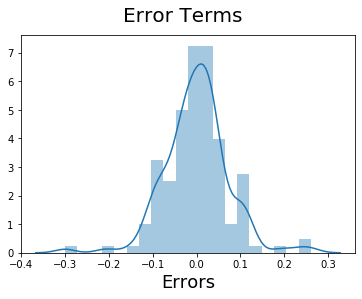

In [393]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Step 8: Making Predictions Using the Final Model

Applying the scaling on the test set

In [394]:
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [395]:
df_test[num_vars].describe()

,price,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,symboling
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,0.209644,0.370121,0.486741,0.375212,0.454249,0.371743,0.228835,0.667691,0.654504,0.209375,0.359521,0.393351,0.450941,0.583871
std,0.210911,0.179970,0.183964,0.208977,0.234487,0.222354,0.188416,0.228484,0.173913,0.273690,0.252970,0.192092,0.258014,0.271724
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.076536,0.265306,0.389764,0.221053,0.264423,0.219125,0.126638,0.515873,0.590164,0.093750,0.140323,0.265306,0.208333,0.400000
50%,0.136847,0.327988,0.475591,0.326316,0.485577,0.344065,0.183406,0.674603,0.699454,0.125000,0.312903,0.346939,0.416667,0.600000
75%,0.280049,0.482507,0.642126,0.421053,0.605769,0.540726,0.287118,0.857143,0.759563,0.150000,0.432258,0.540816,0.625000,0.800000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Dividing into X_test and y_test


In [396]:
y_test = df_test.pop('price')
X_test = df_test

In [397]:
# Creating the test dataset with only columns from the final train model set
X_test_lm = X_test[X_train_rfe.columns]

In [398]:
# Add a constant variable
X_test_fnl = sm.add_constant(X_test_lm)

In [399]:
# Making predictions
y_pred_fnl = lr.predict(X_test_fnl)

## Step 9: Model Evaluation

Text(0, 0.5, 'y_pred')

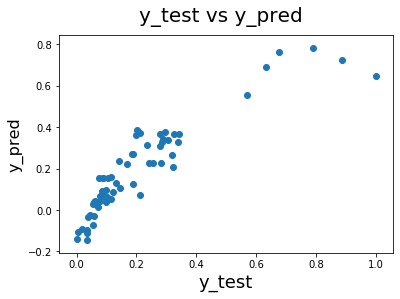

In [400]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_fnl)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

In [401]:
from sklearn.metrics import r2_score

In [402]:
r2_score(y_test, y_pred_fnl)

0.8025379113763971

##### So the final equation is like following : <br>
y = -0.1449  + 0.8671(curbweight) + 0.3085 (eng_loc_front) - 0.1535(eng_typ_l) + 0.2994 (cyl_three) + 0.1700 (cyl_twelve) + 0.2482(bmw) + 0.2087(porsche)

##### This means that the price is higly dependent on the curbweight which is basically all the build quality that goes into the car like engine, wheel ,seats etc, it is also positively correlated to some well known brands like BMW or Porsche ,there is some correlation to the number of cylinders(3 and 12) which could basically mean either the cars with low capacity or at the extreme capacity (performance wise) also apparently the cars with engines in front does increase the value and the price is negatively correlated to one type of engine(eng_typ_l) maybe there are some safety or other kind of issues with that engine.